# Hamming distance histograms

Local and global Hamming distance superimposed. 
- Local: the surface of the neutral space 
- Global: the total genotypes in the map

No deleterious ignores the gneotypes of phenotype '.'*L

In [1]:
import pickle 
with open("../data/hammingglobalDPD_nodel.pkl","rb") as f:
    hammingglobalDPD = pickle.load(f)
with open("../data/hamminglocalDPD_nodel.pkl","rb") as f:
    hamminglocalDPD = pickle.load(f)
with open("../data/edgeD.pkl","rb") as f:
    edgeD = pickle.load(f)
with open("../data/neutralsets.pkl","rb") as f:
    neutralsets = pickle.load(f)
L=12
K=4

In [5]:
len(neutralsets)

48

In [2]:
from collections import defaultdict
sort_neutralsets = defaultdict(float)
sorted_neutralsets = dict(sorted(neutralsets.items(), key=lambda item: item[1], reverse=True))
for k, v in sorted_neutralsets.items():
    k = k.replace('\n', '')
    sort_neutralsets[k] = v

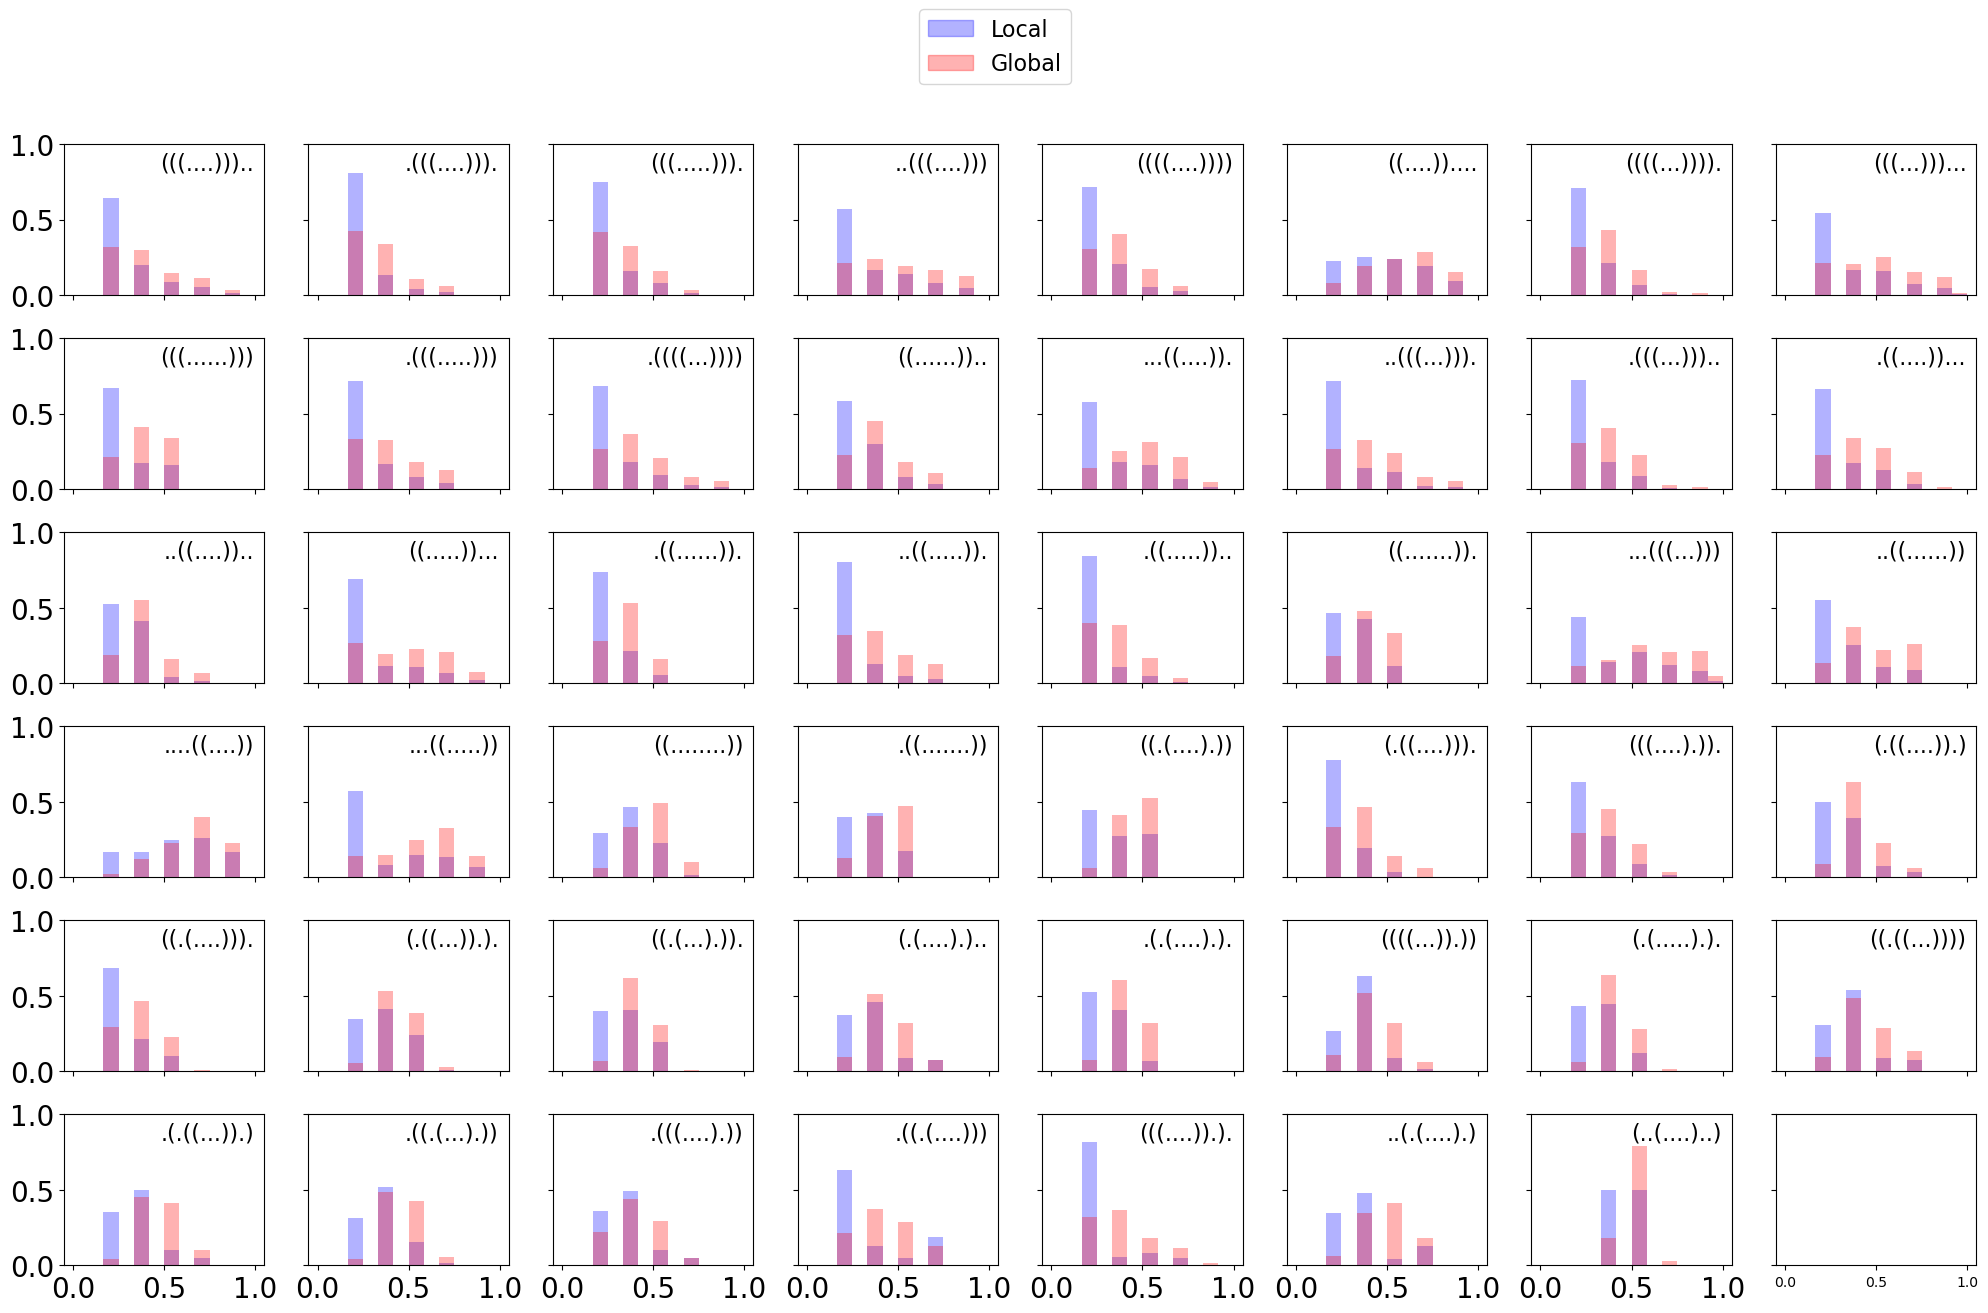

In [3]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib.patches as mpatches

fig, axs = plt.subplots(6, 8, figsize=(20, 12), sharex=True, sharey=True)  # 5 rows, 8 columns

bins = np.linspace(0, 1, L+1)
freqlist = defaultdict(list)

for i, ax in enumerate(axs.flatten()):
    if i < len(hamminglocalDPD):
        key = list(sort_neutralsets.keys())[i+1]

        h_values = list(hamminglocalDPD[key].keys())
        counts = list(hamminglocalDPD[key].values())
        
        for i,j in zip(h_values,counts):
            i*=12
            freqlist[i].append(j/edgeD[key])

        ax.hist(h_values, bins=bins, weights=np.array(counts)/(edgeD[key]), color='blue', alpha=0.3)
        
        h_values1 = list(hammingglobalDPD[key].keys())
        counts1 = np.array(list(hammingglobalDPD[key].values()))/np.sum(list(sort_neutralsets.values())[1:])
        
        ax.hist(h_values1, bins=bins, weights=np.array(counts1), color='red', alpha=0.3)
        
        ax.text(0.95, 0.95, key, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=16)
        ax.set_yticks([0.0,0.5,1.0])
        ax.set_xticks([0.0,0.5,1.0])
        ax.tick_params(axis='both', which='major', labelsize=20)  # Set tick label size


blue_patch = mpatches.Patch(color='blue', alpha=0.3, label='Local')
red_patch = mpatches.Patch(color='red', alpha=0.3, label='Global')
fig.legend(handles=[blue_patch, red_patch], loc='upper center', bbox_to_anchor=(0.5, 1.1), fontsize=16)
plt.tight_layout()
plt.savefig("hamming.png", bbox_inches='tight')
plt.show()

## Combined

[0.6405799811988444, 0.05347796770335517, 0.015083251714005876, 0.08908991578854114, 0.20176888359525344, 0.8104640309416062, 0.01903203149307037, 0.040364935081871924, 0.13013900248345142, 0.7486968087045367, 0.15765672405047998, 0.013052222429367292, 0.080594244815616, 0.567350214660285, 0.16404271490238312, 0.13830108782730924, 0.08073310228863372, 0.04957288032138885, 0.7175279717276588, 0.20255385382428664, 0.05596649886772374, 0.023951675580330862, 0.2275120316945412, 0.09200989124943497, 0.19047834294982585, 0.2389640777473477, 0.2510356563588503, 0.7117626780451165, 0.06789857107307641, 0.20963720917490258, 0.007346679725401294, 0.0033548619815031698, 0.5462178562556209, 0.1599517783653559, 0.0737440517342649, 0.04796357957051162, 0.005045554423622438, 0.16707717965062424, 0.6710489269735124, 0.15815962572812772, 0.17079144729835985, 0.7145543508937716, 0.16386606585085095, 0.07895062296059287, 0.04262896029478451, 0.6822580360348695, 0.17655290745242538, 0.09397643194754284, 0

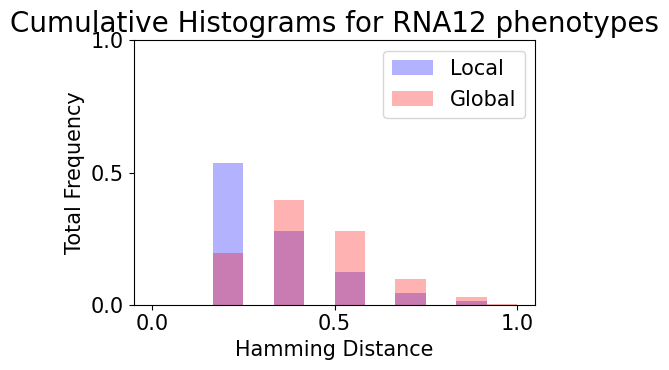

In [4]:

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from collections import defaultdict, OrderedDict

fig, ax = plt.subplots(figsize=(5, 4))


bins = np.linspace(0, 1, 13)  # Assuming L = 12

# Initialize lists to aggregate data
all_local_h_values = []
all_local_counts = []
all_global_h_values = []
all_global_counts = []

# Process data and aggregate for cumulative histograms
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue  # Skip the first entry

    # Local Hamming distances
    h_values_local = list(hamminglocalDPD[key].keys())
    counts_local = list(hamminglocalDPD[key].values())
    all_local_h_values.extend(h_values_local)
    all_local_counts.extend(np.array(counts_local) / edgeD[key])

    # Global Hamming distances
    h_values_global = list(hammingglobalDPD[key].keys())
    counts_global = np.array(list(hammingglobalDPD[key].values())) / np.sum(list(sort_neutralsets.values())[1:])
    all_global_h_values.extend(h_values_global)
    all_global_counts.extend(counts_global)

# Normalize the counts
print(all_local_counts)
total_local_counts = np.sum(all_local_counts)

total_global_counts = np.sum(all_global_counts)
normalized_local_counts = np.array(all_local_counts) / total_local_counts
normalized_global_counts = np.array(all_global_counts) / total_global_counts

# Plot the cumulative histograms
ax.hist(all_local_h_values, bins=bins, weights=normalized_local_counts, color='blue', alpha=0.3, label='Local')
ax.hist(all_global_h_values, bins=bins, weights=normalized_global_counts, color='red', alpha=0.3, label='Global')

ax.set_xlabel('Hamming Distance', fontsize=15)
ax.set_ylabel('Total Frequency', fontsize=15)
ax.set_title('Cumulative Histograms for RNA12 phenotypes', fontsize=20)
#ax.set_title('Cumulative Histograms of Hamming Distances', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xticks([0.0, 0.5, 1.0])
ax.set_yticks([0.0, 0.5, 1.0])
plt.legend(fontsize=15)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("cumulative_histograms.png", bbox_inches='tight')
plt.show()

[0.16666667 0.33333333 0.5        0.66666667 0.83333333 1.        ]


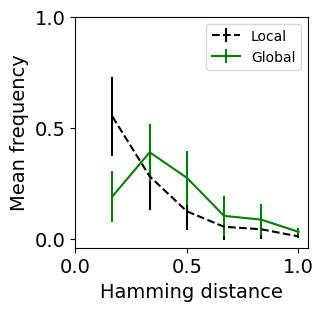

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from collections import defaultdict, OrderedDict

fig, ax = plt.subplots(figsize=(3, 3))
freqlistlocal = defaultdict(list)
freqlistglobal = defaultdict(list)
for key in list(sort_neutralsets.keys()):
        if key == '.'*L: continue

        h_values = list(hamminglocalDPD[key].keys())
        counts = list(hamminglocalDPD[key].values())
        
        for i,j in zip(h_values,counts):
            i*=12
            freqlistlocal[i].append(j/edgeD[key])
        
        h_values = list(hammingglobalDPD[key].keys())
        counts = list(hammingglobalDPD[key].values())
        
        for i,j in zip(h_values,counts):
            i*=12
            freqlistglobal[i].append(j/np.sum(list(sort_neutralsets.values())[1:]))

distavg_local = defaultdict()
diststd_local= defaultdict()
distavg_global = defaultdict()
diststd_global= defaultdict()
for dist,freq in freqlistlocal.items():
    distavg_local[dist] = np.mean(freq)
    diststd_local[dist] = np.std(freq)
for dist,freq in freqlistglobal.items():
    distavg_global[dist] = np.mean(freq)
    diststd_global[dist] = np.std(freq)
distavg_global = {k: v for k, v in sorted(distavg_global.items())}
distavg_local = {k: v for k, v in sorted(distavg_local.items())}
diststd_global = {k: v for k, v in sorted(diststd_global.items())}
diststd_local = {k: v for k, v in sorted(diststd_local.items())}

ax.errorbar(np.array(list(distavg_local.keys()))/12.,list(distavg_local.values()),yerr = list(diststd_local.values()),color= 'k', linestyle = '--',label = 'Local')
ax.errorbar(np.array(list(distavg_global.keys()))/12.,list(distavg_global.values()),yerr = list(diststd_global.values()), color = 'g', label = 'Global')
ax.set_yticks([0.0,0.5,1.0], fontsize=14)
print(np.array(list(distavg_local.keys()))/12)
#ax.set_xticks([np.round(2/12,2),np.round(4/12,2),np.round(6/12,2),np.round(8/12,2),np.round(10/12,2),np.round(12/12,1)])
ax.set_xticks([0.0,0.5,1.0]) 

ax.tick_params(axis='x', labelsize=14)
ax.tick_params(axis='y', labelsize=14)
ax.set_ylabel('Mean frequency', fontsize=14)

ax.set_xlabel('Hamming distance', fontsize = 14)
plt.legend()


# $\phi_{pq}$ with Hamming distance

The $\phi_{pq}$ is the probability of phenotype $q$ mutating to a phenoytpe $p$:

$\sum_p \phi_{pq}$ = 1 

We check that probabilities are higher for similar phenotypes.

Colormap divides warm to cool, with cool colours corresponding to similar phenotypes (low $H$) and  warm colours to less similar (high $H$), normalised from 0-1 with $H-0.5$ as the midpoint for the normalised colormap.

We skip the deleterious and the neutral set.

In [4]:
import pickle
with open("../data/phipq.pkl","rb") as f:
    phipq = pickle.load(f)

L=12
K=4

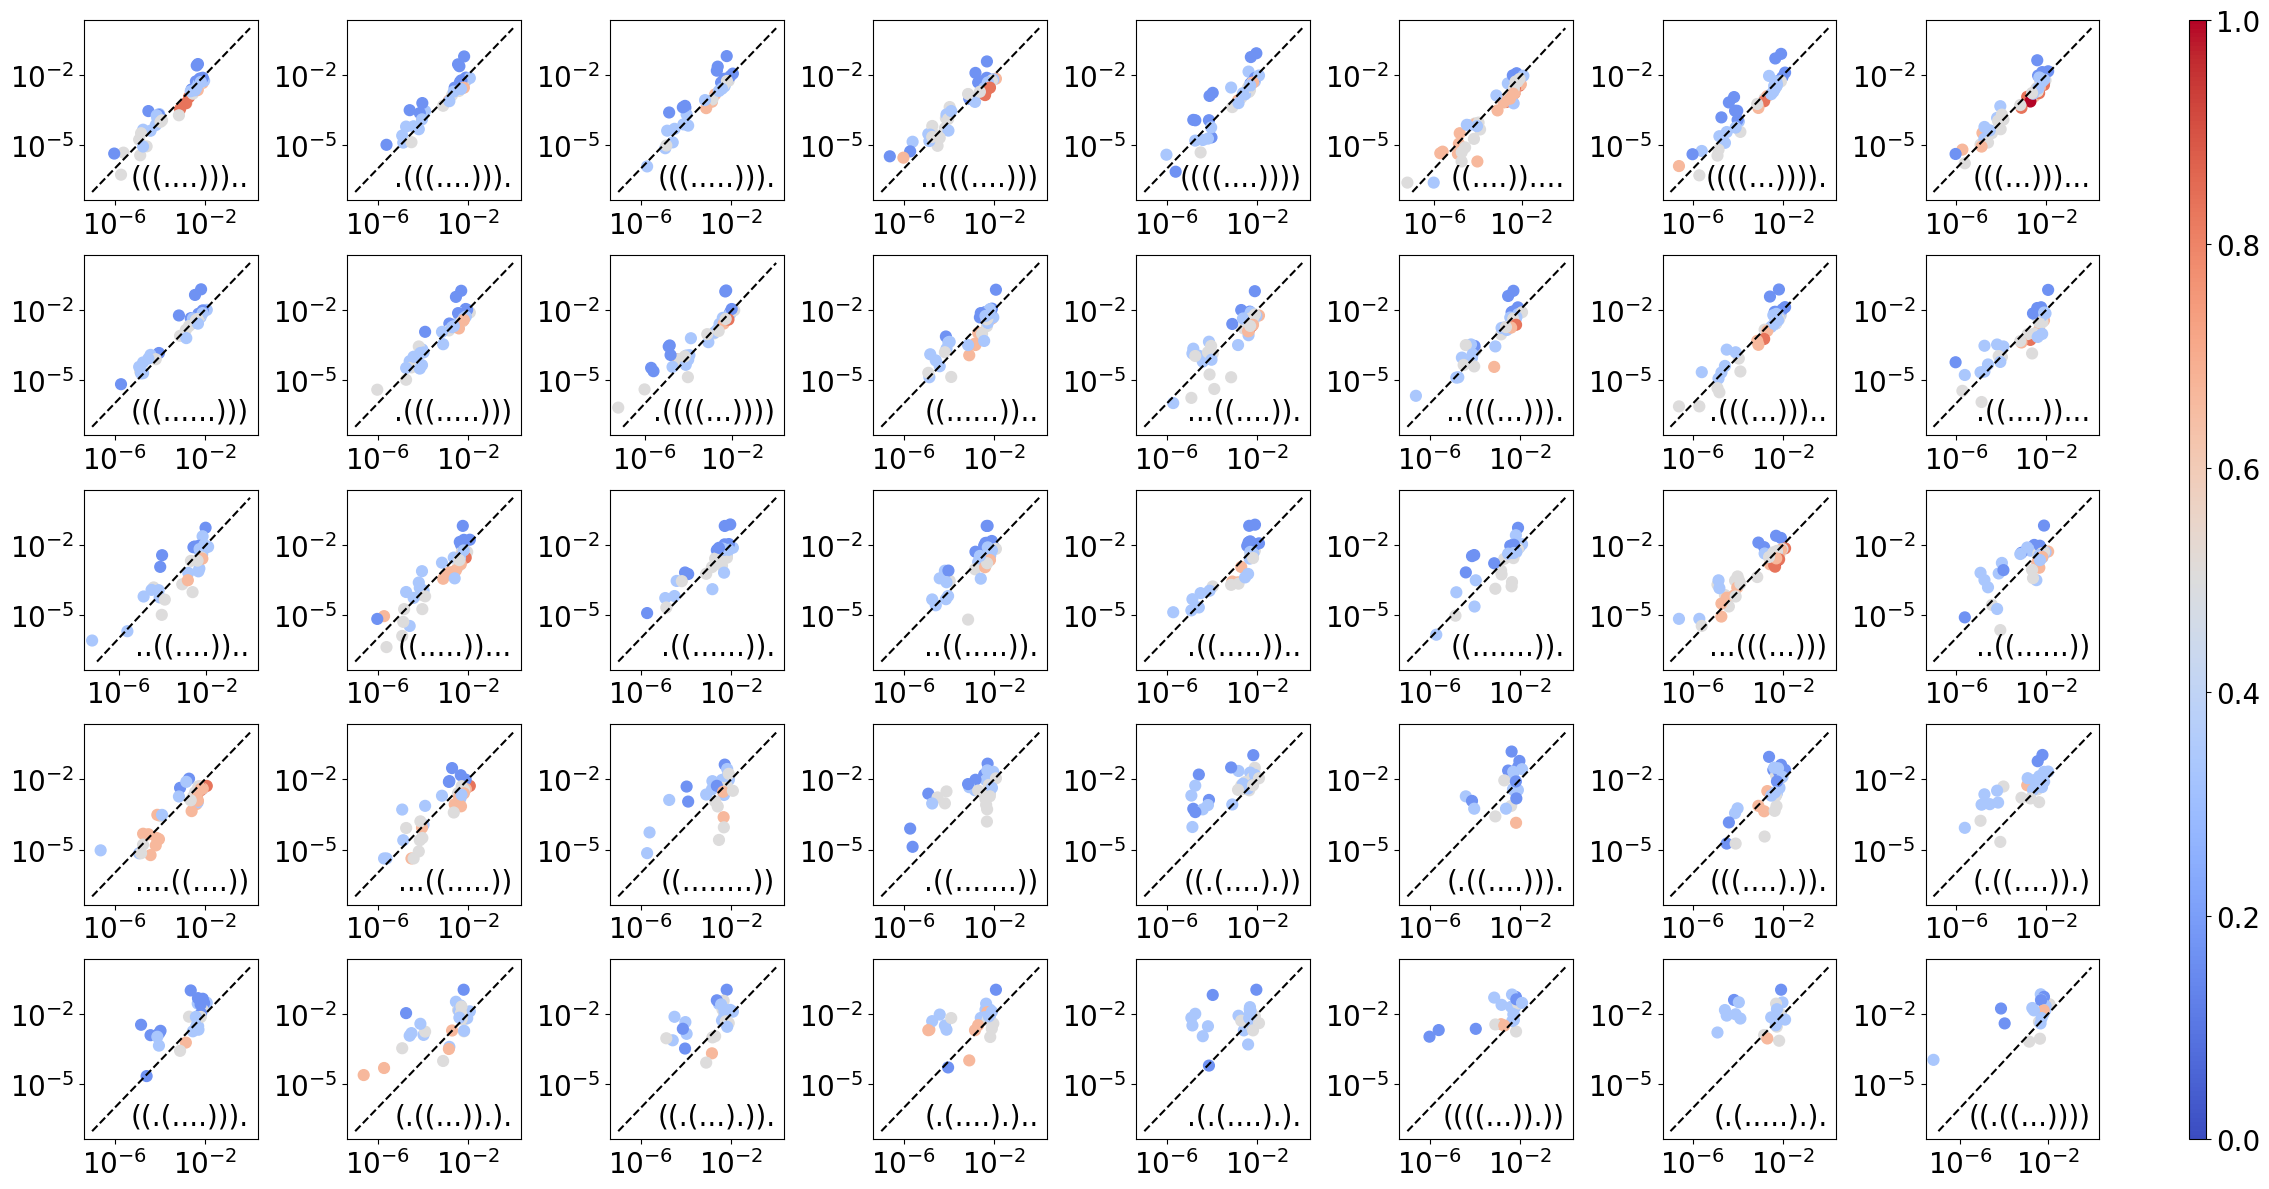

In [5]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Create a grid layout with space for the colorbar
fig = plt.figure(figsize=(24, 12))
gs = GridSpec(5, 9, figure=fig, width_ratios=[1, 1, 1, 1, 1, 1, 1, 1, 0.1])

plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
cmap = plt.get_cmap('coolwarm')  # Get the colormap
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)  # Use custom normalization

axs = [fig.add_subplot(gs[i, j]) for i in range(5) for j in range(8)]

for i, ax in enumerate(axs):
    if i < len(phipq):
        key = list(sort_neutralsets.keys())[i+1]
        qitems = phipq[key]
        listphipq = []
        listhamming = []
        listfreq = []
        
        for q, phi in qitems.items():
            if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
                continue
            listphipq.append(phi)
            listhamming.append(hamming(key, q))
            listfreq.append(neutralsets[q+'\n'] / K**L)
        
        scatter = ax.scatter(listfreq, listphipq, s=60, c=listhamming, cmap=cmap, norm=norm, alpha=1)  # Use the colormap to determine the color

        ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
        ax.set_xscale("log")
        ax.set_yscale('log')
        ax.set_xticks([1e-6, 1e-2])
        ax.text(0.95, 0.05, key, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)  # Set tick label size

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_subplot(gs[:, -1])  # Create an axis for the colorbar
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label('')
cbar.ax.tick_params(labelsize=20)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the colorbar
plt.savefig("phipq.png", bbox_inches='tight')
plt.show()

## Combined

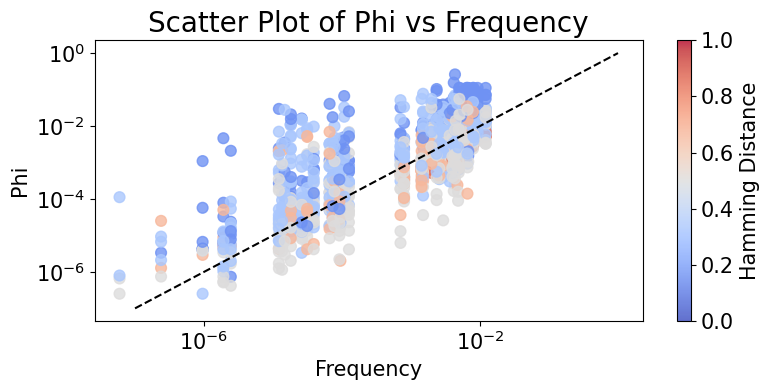

In [6]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result



fig, ax = plt.subplots(figsize=(8, 4))

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
#cmap = plt.get_cmap('coolwarm')  # Get the colormap
#norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)  # Use custom normalization
cmap = plt.get_cmap('coolwarm')  # Get the Blues colormap
norm = mcolors.Normalize(vmin=0, vmax=1)  # Normalize from 0 to 1

listphipq = []
listhamming = []
listfreq = []

# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue  # Skip the first entry

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
            continue
        listphipq.append(phi)
        listhamming.append(hamming(key, q))
        listfreq.append(neutralsets[q+'\n'] / K**L)

# Plot the scatter plot
scatter = ax.scatter(listfreq, listphipq, s=60, c=listhamming, cmap=cmap, norm=norm, alpha=0.8)  # Use the colormap to determine the color

ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
ax.set_xscale("log")
ax.set_yscale('log')
ax.set_xticks([1e-6, 1e-2])
ax.set_xlabel('Frequency', fontsize=15)
ax.set_ylabel('Phi', fontsize=15)
ax.set_title('Scatter Plot of Phi vs Frequency', fontsize=20)
ax.tick_params(axis='both', which='major', labelsize=15)

# Add a colorbar for the entire figure on the side
cbar = fig.colorbar(scatter, ax=ax, orientation='vertical')
cbar.set_label('Hamming Distance', fontsize=15)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_3916315/1062136795.py:124: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


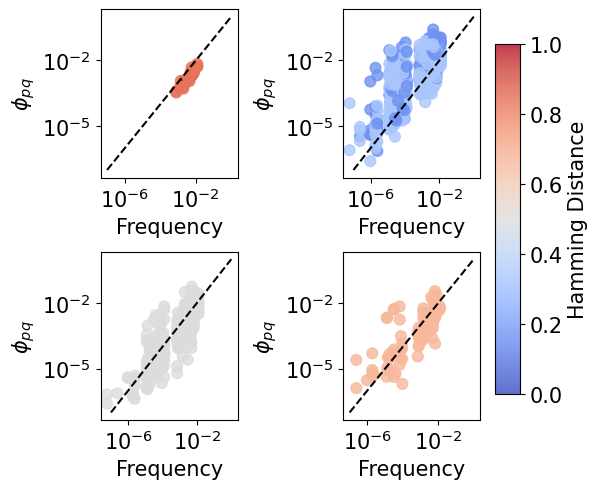

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(5, 5))
gs = GridSpec(2, 2, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamminghigh = []
listhamminglow= []
listfreqhigh = []
listfreqlow = []
listphipqhigh = []
listphipqlow = []
listfreq = []
listhammingmedlow = []
listfreqmedlow = []
listphipqmedlow = []
listhammingmedhigh = []
listfreqmedhigh = []
listphipqmedhigh = []

# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:
            continue
        listhamming.append(hamming(key, q))
        if hamming(key, q) >= 0.83:
            listphipqhigh.append(phi)
            listhamminghigh.append(hamming(key, q))
            listfreqhigh.append(neutralsets[q+'\n'] / K**L)
        if hamming(key, q) < 0.5:
            listphipqlow.append(phi)
            listhamminglow.append(hamming(key, q))
            listfreqlow.append(neutralsets[q+'\n'] / K**L)
        if hamming(key, q) < 0.83 and hamming(key, q) >= 0.66:
            listphipqmedhigh.append(phi)
            listhammingmedhigh.append(hamming(key, q))
            listfreqmedhigh.append(neutralsets[q+'\n'] / K**L)
        if hamming(key, q) >= 0.5 and hamming(key, q) < 0.66:
            listphipqmedlow.append(phi)
            listhammingmedlow.append(hamming(key, q))
            listfreqmedlow.append(neutralsets[q+'\n'] / K**L)

# First subplot
ax1 = fig.add_subplot(gs[0, 0])
scatter1 = ax1.scatter(listfreqhigh, listphipqhigh, s=60, c=listhamminghigh, cmap=cmap, norm=norm, alpha=0.8)
ax1.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
ax1.set_xscale("log")
ax1.set_yscale('log')
ax1.set_xticks([1e-6, 1e-2])
ax1.set_xlabel('Frequency', fontsize=15)
ax1.set_ylabel(r'$\phi_{pq}$', fontsize=15)
ax1.tick_params(axis='both', which='major', labelsize=15)

# Second subplot
ax2 = fig.add_subplot(gs[0, 1])
scatter2 = ax2.scatter(listfreqlow, listphipqlow, s=60, c=listhamminglow, cmap=cmap, norm=norm, alpha=0.8)
ax2.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
ax2.set_xscale("log")
ax2.set_yscale('log')
ax2.set_xticks([1e-6, 1e-2])
ax2.set_xlabel('Frequency', fontsize=15)
ax2.set_ylabel(r'$\phi_{pq}$', fontsize=15)
ax2.tick_params(axis='both', which='major', labelsize=15)

ax3 = fig.add_subplot(gs[1, 0])
scatter3 = ax3.scatter(listfreqmedlow, listphipqmedlow, s=60, c=listhammingmedlow, cmap=cmap, norm=norm, alpha=0.8)
ax3.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
ax3.set_xscale("log")
ax3.set_yscale('log')
ax3.set_xticks([1e-6, 1e-2])
ax3.set_xlabel('Frequency', fontsize=15)
ax3.set_ylabel(r'$\phi_{pq}$', fontsize=15)
ax3.tick_params(axis='both', which='major', labelsize=15)

ax4 = fig.add_subplot(gs[1, 1])
scatter4 = ax4.scatter(listfreqmedhigh, listphipqmedhigh, s=60, c=listhammingmedhigh, cmap=cmap, norm=norm, alpha=0.8)
ax4.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
ax4.set_xscale("log")
ax4.set_yscale('log')
ax4.set_xticks([1e-6, 1e-2])
ax4.set_xlabel('Frequency', fontsize=15)
ax4.set_ylabel(r'$\phi_{pq}$', fontsize=15)
ax4.tick_params(axis='both', which='major', labelsize=15)


# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([1, 0.2, 0.05, 0.7]) 
cbar = fig.colorbar(scatter1, cax=cbar_ax)
cbar.set_label('Hamming Distance', fontsize=15)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout()
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()
plt.show()

/tmp/ipykernel_1717124/1939426175.py:92: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


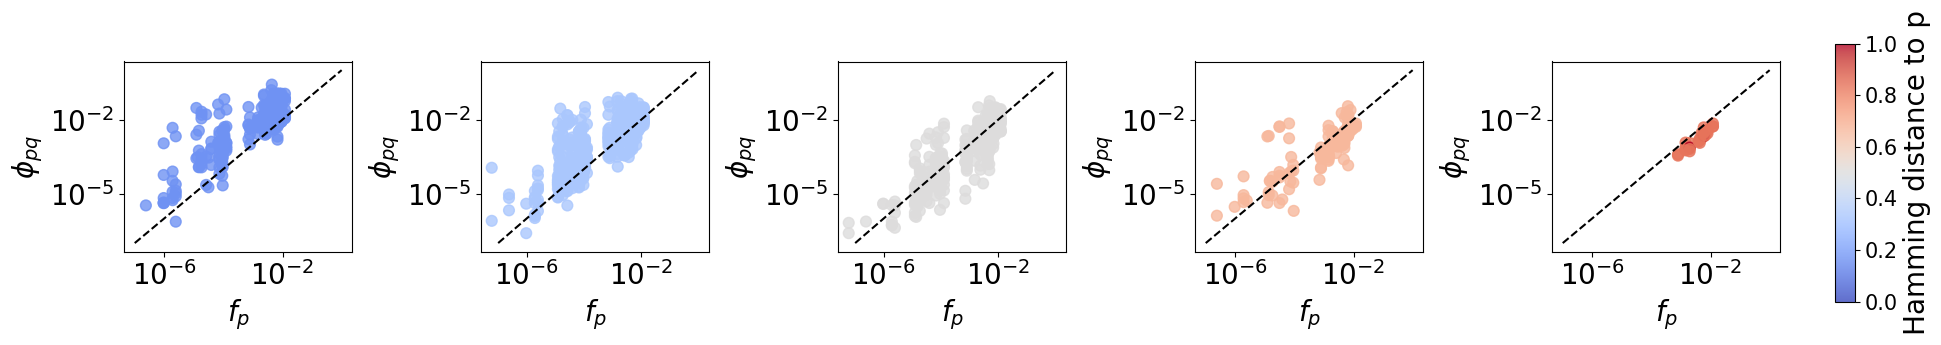

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 3))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]

# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:
            continue
        hamming_dist = hamming(key, q)
        listphipq.append(phi)
        listhamming.append(hamming_dist)
        listfreq.append(neutralsets[q+'\n'] / K**L)

        # Assign to appropriate range
        if hamming_dist < 4/12:
            idx = 0
        elif hamming_dist < 6/12:
            idx = 1
        elif hamming_dist < 8/12:
            idx = 2
        elif hamming_dist < 10/12:
            idx = 3
        else:
            idx = 4

        listphipq_ranges[idx].append(phi)
        listhamming_ranges[idx].append(hamming_dist)
        listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(5):
    ax = fig.add_subplot(gs[0, j])
    scatter = ax.scatter(listfreq_ranges[j], listphipq_ranges[j], s=60, c=listhamming_ranges[j], cmap=cmap, norm=norm, alpha=0.8)
    ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax.set_xscale("log")
    ax.set_yscale('log')
    ax.set_xticks([1e-6, 1e-2])
    ax.set_xlabel(r'$f_p$', fontsize=20)
    ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

## Overrepresented
Ranking of the distance to diagonal to check which stuctures are the most probable. These are indeed the ones that have one less or one more base pair close to the original base pairs

/tmp/ipykernel_590374/3792204726.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar


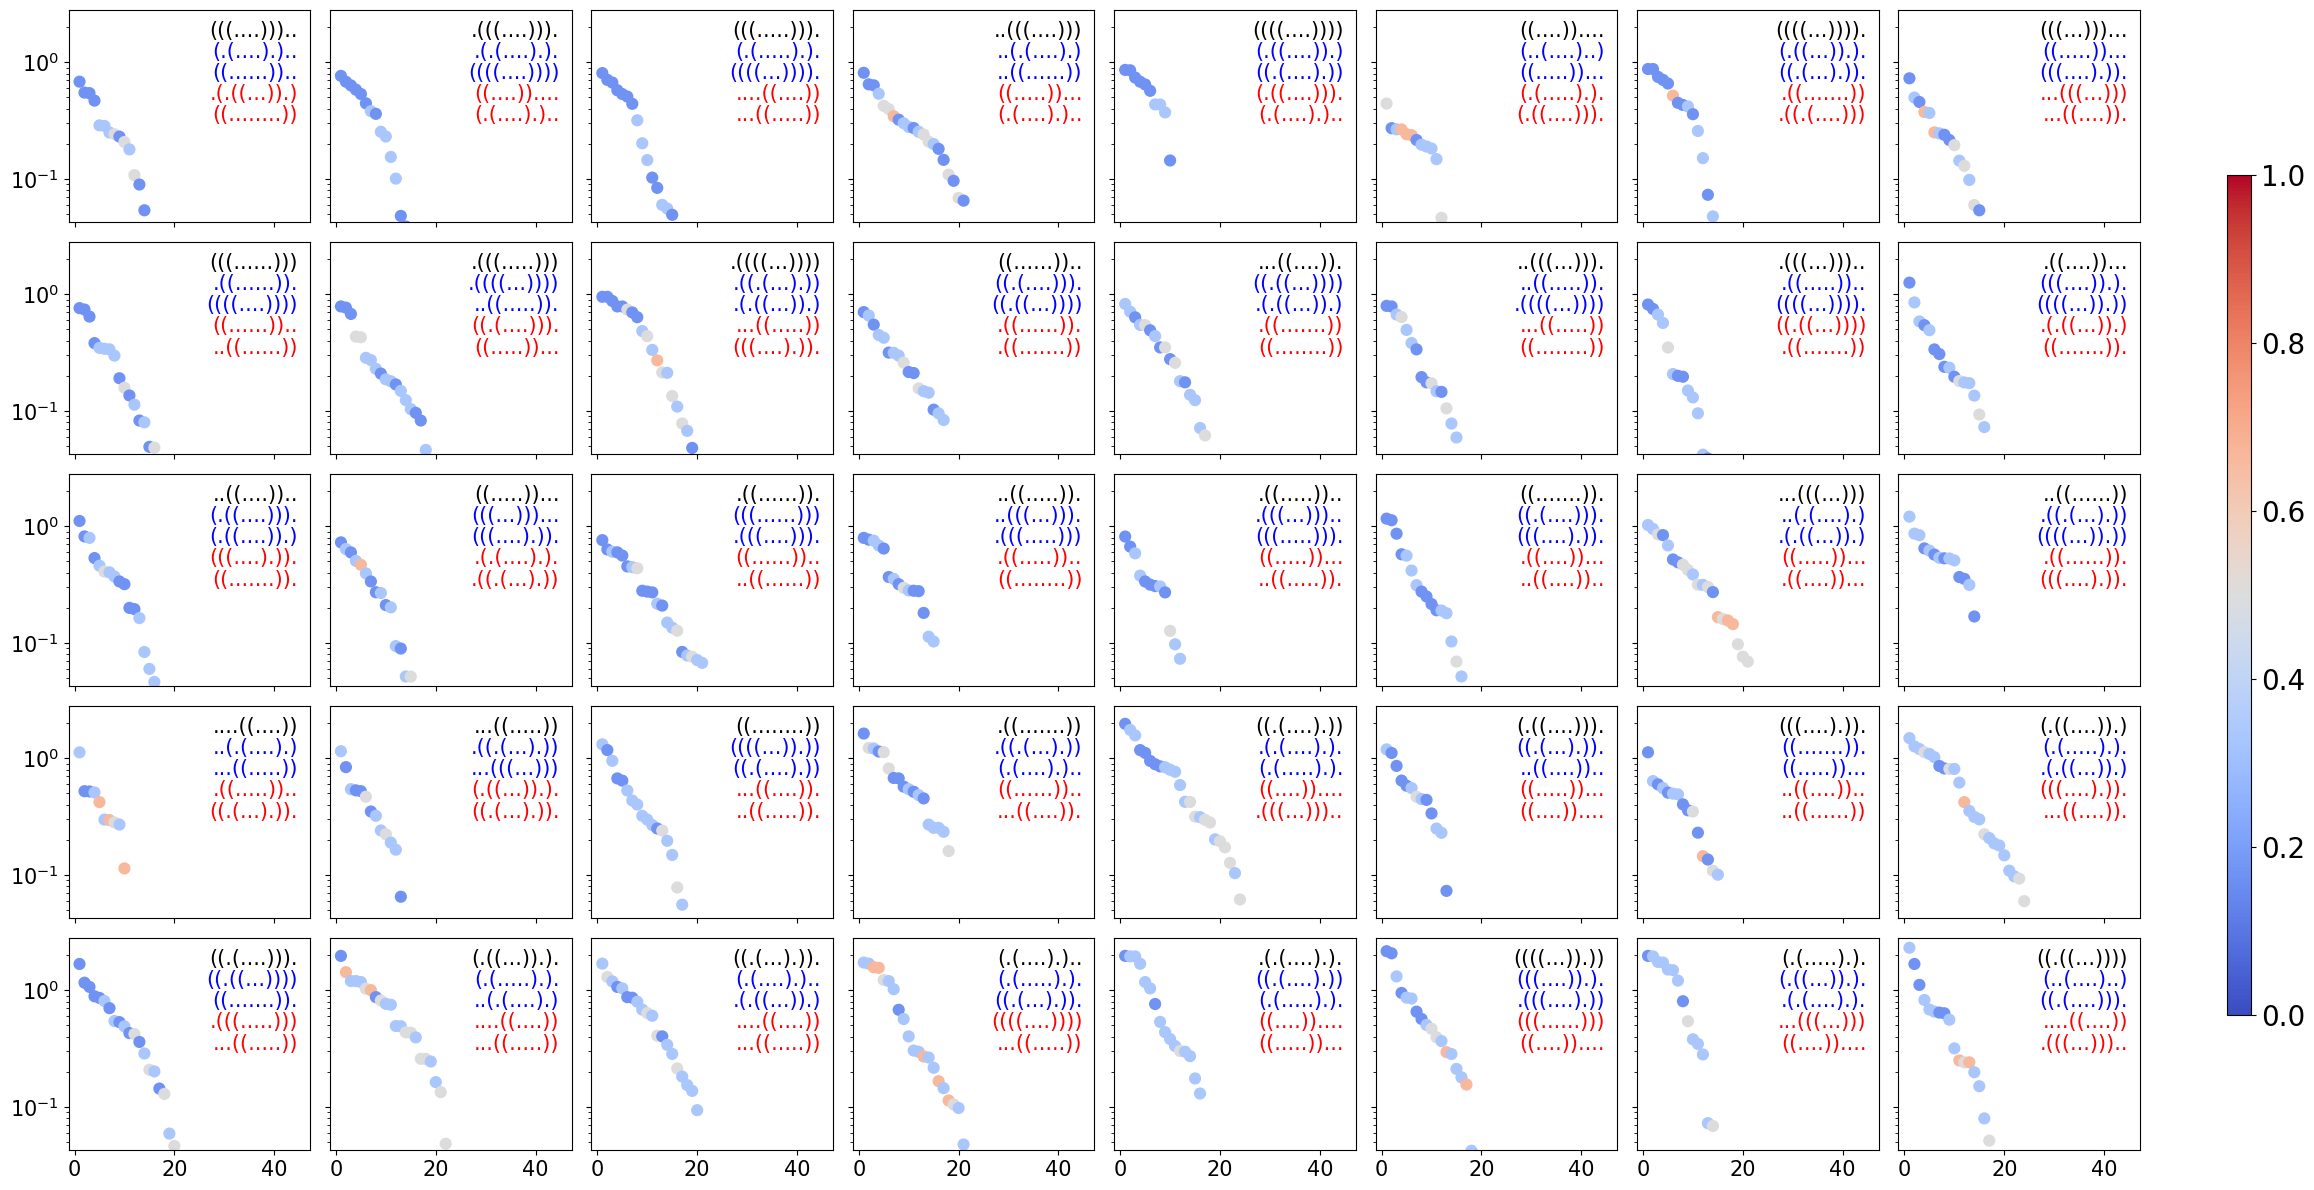

In [13]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Create a grid layout with space for the colorbar
fig, axs = plt.subplots(5, 8, figsize=(24, 12), sharex=True, sharey=True)
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
cmap = plt.get_cmap('coolwarm')  # Get the colormap
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)  # Use custom normalization

for i, ax in enumerate(axs.flatten()):
    if i < len(phipq):
        key = list(sort_neutralsets.keys())[i+1]
        qitems = phipq[key]
        listphipq = []
        listfreq = []
        distances = []
        listhamming = []
        phenos = []

        for q, phi in qitems.items():
            if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
                continue
            listphipq.append(phi)
            listfreq.append(neutralsets[q+'\n'] / K**L)
            listhamming.append(hamming(key, q))
            # Calculate the distance from the point to the diagonal y = x
            distance = (np.log10(phi) - np.log10(neutralsets[q+'\n'] / K**L)) / np.sqrt(2)
            distances.append(distance)
            phenos.append(q)
        
        # Get the sorted indices of distances in descending order
        sorted_indices = np.argsort(distances)[::-1]
        
        # Sort distances and listhamming based on the sorted indices
        ranked_distances = np.array(distances)[sorted_indices]
        sorted_listhamming = np.array(listhamming)[sorted_indices]
        sorted_phenos = np.array(phenos)[sorted_indices]
        
        # Plot the distance versus its ranking
        scatter = ax.scatter(np.arange(1, len(ranked_distances)+1), ranked_distances, s=60, c=sorted_listhamming, cmap=cmap, norm=norm, alpha=1)
        ax.set_yscale('log')
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.text(0.95, 0.95, key, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15)
        for j in range(1,3):
            ax.text(0.95, 0.95-0.1*j, f"{sorted_phenos[j-1]}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15, color = 'blue')
        for k in range(1,3):
            ax.text(0.95, 0.95-0.1*j-0.1*k, f"{sorted_phenos[-2:][k-1]}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15, color = 'red')
# Set common labels
#fig.text(0.5, 0.04, 'Ranking', ha='center', fontsize=20)
#fig.text(0.04, 0.5, 'Distance', va='center', rotation='vertical', fontsize=20)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.7])  # Move to the right and make thinner
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label('')
cbar.ax.tick_params(labelsize=20)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar
plt.savefig("distance_ranking.png", bbox_inches='tight')
plt.show()

### combined

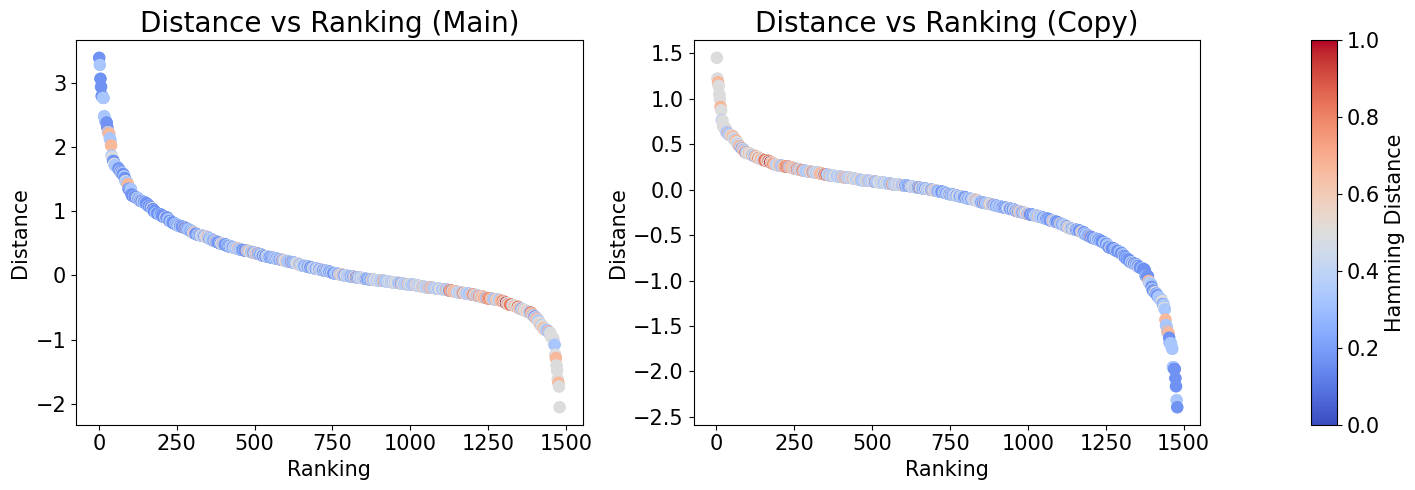

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result


# Populate your data here...

fig = plt.figure(figsize=(15, 5))
gs = GridSpec(1, 3, width_ratios=[1, 1, 0.05], figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
#cmap = plt.get_cmap('coolwarm')  # Get the colormap
#norm = MidpointNormalize(vmin=0, vmax=1, midpoint=(6/12))  # Use custom normalization
cmap = plt.get_cmap('coolwarm')
norm = mcolors.Normalize(vmin=0, vmax=1)  # Normalize from 0 to 1

listphipq = []
listfreq = []
listhamming = []
distances = []
phenos = []

# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue  # Skip the first entry

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
            continue
        listphipq.append(phi)
        listfreq.append(neutralsets[q+'\n'] / K**L)
        listhamming.append(hamming(key, q))
        # Calculate the distance from the point to the diagonal y = x
        #distance = (np.log10(phi) - np.log10(neutralsets[q+'\n'] / K**L)) / np.sqrt(2)
        distance = (np.log10(phi) - np.log10(neutralsets[q+'\n'] / K**L))
        distances.append(distance)
        phenos.append(q)


sorted_indices = np.argsort(distances)[::-1]
# Sort distances and listhamming based on the sorted indices
ranked_distances = np.array(distances)[sorted_indices]
sorted_listhamming = np.array(listhamming)[sorted_indices]
sorted_phenos = np.array(phenos)[sorted_indices]

# Create the main scatter plot
ax1 = fig.add_subplot(gs[0, 0])
scatter1 = ax1.scatter(np.arange(1, len(ranked_distances)+1), ranked_distances, s=60, c=sorted_listhamming, cmap=cmap, norm=norm, alpha=1)
#ax1.set_yscale('log')
#ax1.set_xscale('log')
ax1.set_xlabel('Ranking', fontsize=15)
ax1.set_ylabel('Distance', fontsize=15)
ax1.set_title('Distance vs Ranking (Main)', fontsize=20)
ax1.tick_params(axis='both', which='major', labelsize=15)

listphipq = []
listfreq = []
listhamming = []
distances = []
phenos = []

for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue  # Skip the first entry

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
            continue
        listphipq.append(phi)
        listfreq.append(neutralsets[q+'\n'] / K**L)
        listhamming.append(hamming(key, q))
        # Calculate the distance from the point to the diagonal y = x
        if hamming(key, q) >= (2/12):
            distance = - (np.log10(phi) - np.log10(neutralsets[q+'\n'] / K**L)) / np.sqrt(2)
            distances.append(distance)
            phenos.append(q)


sorted_indices = np.argsort(distances)[::-1]
        
# Sort distances and listhamming based on the sorted indices
ranked_distances = np.array(distances)[sorted_indices]
sorted_listhamming = np.array(listhamming)[sorted_indices]
sorted_phenos = np.array(phenos)[sorted_indices]

# Create the copy scatter plot
ax2 = fig.add_subplot(gs[0, 1])
scatter2 = ax2.scatter(np.arange(1, len(ranked_distances)+1), np.array(ranked_distances), s=60, c=sorted_listhamming, cmap=cmap, norm=norm, alpha=1)
#ax2.set_yscale('log')
#ax2.set_xscale('log')
ax2.set_xlabel('Ranking', fontsize=15)
ax2.set_ylabel('Distance', fontsize=15)
ax2.set_title('Distance vs Ranking (Copy)', fontsize=20)
ax2.tick_params(axis='both', which='major', labelsize=15)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_subplot(gs[:, 2])  # Create an axis for the colorbar
cbar = fig.colorbar(scatter1, cax=cbar_ax, orientation='vertical')
cbar.set_label('Hamming Distance', fontsize=15)
cbar.ax.tick_params(labelsize=15)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the colorbar
plt.savefig("distance_ranking_combined.png", bbox_inches='tight')
plt.show()

## Underrepresented

/tmp/ipykernel_590374/1200960788.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar


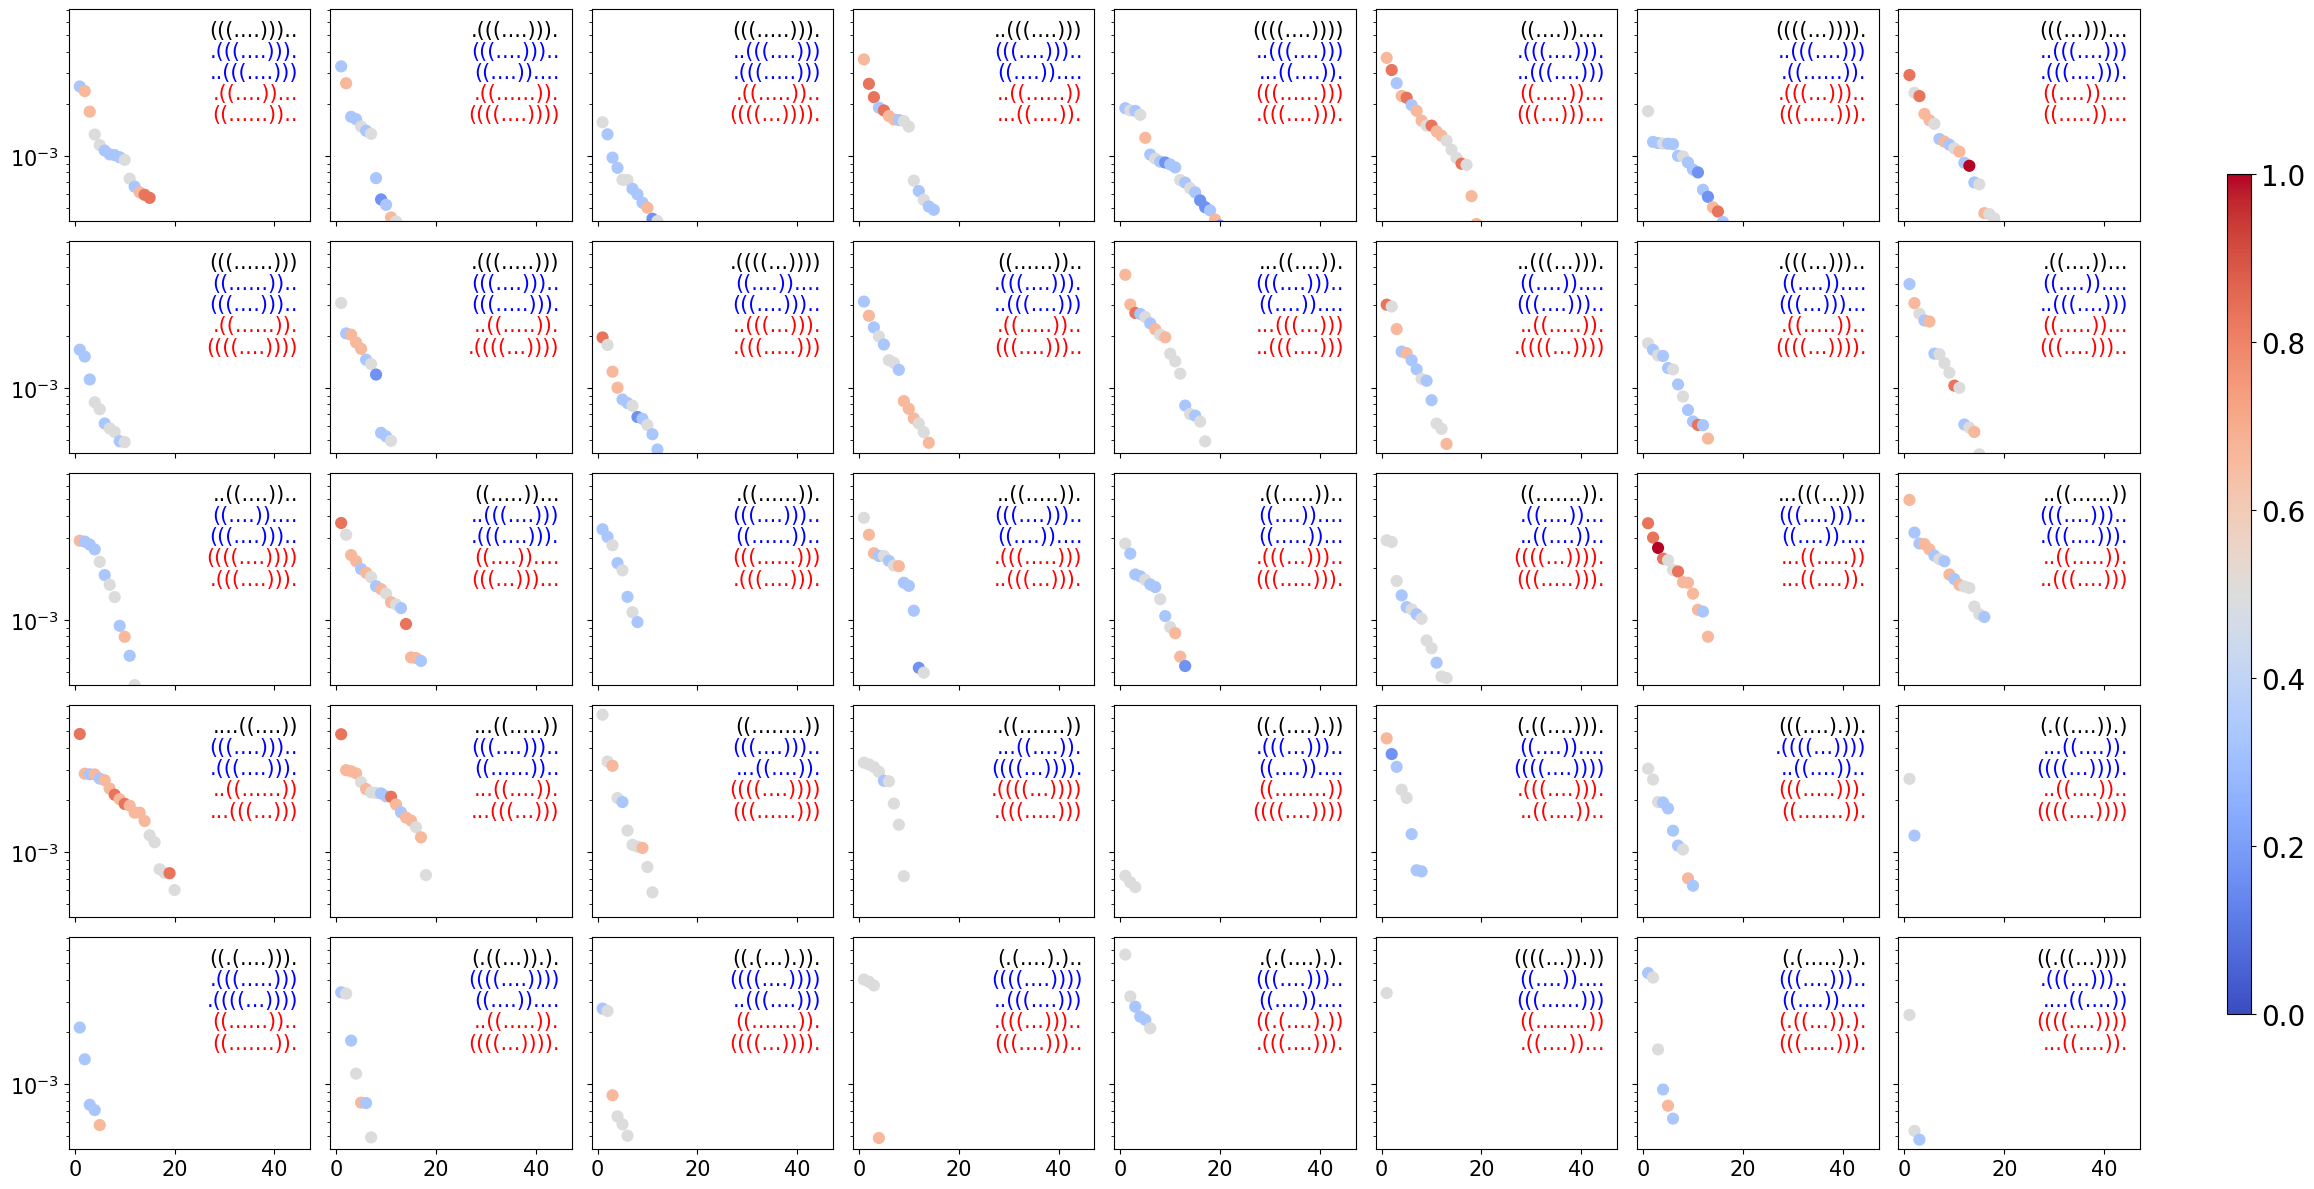

In [15]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Create a grid layout with space for the colorbar
fig, axs = plt.subplots(5, 8, figsize=(24, 12), sharex=True, sharey=True)
plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
cmap = plt.get_cmap('coolwarm')  # Get the colormap
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)  # Use custom normalization

for i, ax in enumerate(axs.flatten()):
    if i < len(phipq):
        key = list(sort_neutralsets.keys())[i+1]
        qitems = phipq[key]
        listphipq = []
        listfreq = []
        distances = []
        listhamming = []
        phenos = []

        for q, phi in qitems.items():
            if q == '.'*L or q == key:  # Skip the neutral set and the del sequence
                continue
            listphipq.append(phi)
            listfreq.append(neutralsets[q+'\n'] / K**L)
            listhamming.append(hamming(key, q))
            # Calculate the distance from the point to the diagonal y = x
            distance = -(phi - (neutralsets[q+'\n'] / K**L)) / np.sqrt(2)
            distances.append(distance)
            phenos.append(q)
        
        # Get the sorted indices of distances in descending order
        sorted_indices = np.argsort(distances)[::-1]
        
        # Sort distances and listhamming based on the sorted indices
        ranked_distances = np.array(distances)[sorted_indices]
        sorted_listhamming = np.array(listhamming)[sorted_indices]
        sorted_phenos = np.array(phenos)[sorted_indices]
        
        # Plot the distance versus its ranking
        scatter = ax.scatter(np.arange(1, len(ranked_distances)+1), ranked_distances, s=60, c=sorted_listhamming, cmap=cmap, norm=norm, alpha=1)
        ax.set_yscale('log')
        ax.tick_params(axis='both', which='major', labelsize=15)
        ax.text(0.95, 0.95, key, horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15)
        for j in range(1,3):
            ax.text(0.95, 0.95-0.1*j, f"{sorted_phenos[j-1]}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15, color = 'blue')
        for k in range(1,3):
            ax.text(0.95, 0.95-0.1*j-0.1*k, f"{sorted_phenos[-2:][k-1]}", horizontalalignment='right', verticalalignment='top', transform=ax.transAxes, fontsize=15, color = 'red')
# Set common labels
#fig.text(0.5, 0.04, 'Ranking', ha='center', fontsize=20)
#fig.text(0.04, 0.5, 'Distance', va='center', rotation='vertical', fontsize=20)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.93, 0.15, 0.01, 0.7])  # Move to the right and make thinner
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label('')
cbar.ax.tick_params(labelsize=20)

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for the colorbar
plt.savefig("distance_ranking.png", bbox_inches='tight')
plt.show()

### combined

# Neutral correlations

In [16]:
with open("../data/rhopDPD.pkl","rb") as f:
    rhopDPD = pickle.load(f)
with open("../data/rhopMFE.pkl","rb") as f:
    rhopD= pickle.load(f)
with open("../data/neutralsetsDPD.pkl","rb") as f:
    neutralsetsDPD= pickle.load(f)

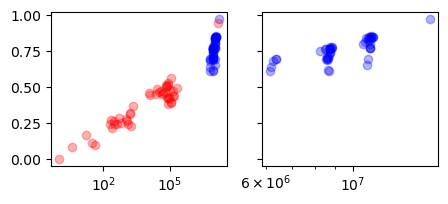

In [17]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots(1,2,figsize=(5,2), sharey=True)
ax[0].scatter(list(neutralsetsDPD.values()),list(rhopDPD.values()),color='blue',alpha=0.3)
ax[0].scatter(list(neutralsets.values()),list(rhopD.values()),color='red',alpha=0.3)
ax[0].set_xscale('log')

ax[1].scatter(list(neutralsetsDPD.values()),list(rhopDPD.values()),color='blue',alpha=0.3)
ax[1].set_xscale('log')

# Site quantities

Take the each site and calculate average Hamming distance (local and global) from each mutation on it in the neutral set.

In [8]:
import pickle
with open("../data/sitesevolvability.pkl","rb") as f:
    sitesevolvability = pickle.load(f)
with open("../data/sitesrobustness.pkl","rb") as f:
    sitesrobustness = pickle.load(f)
with open("../data/siteshammingmean.pkl","rb") as f:
    siteshammingmean = pickle.load(f)
with open("../data/siteshammingstd.pkl","rb") as f:
    siteshammingstd = pickle.load(f)

In [9]:
with open("../data/DGPmap.pkl","rb") as f:
    gpmap = pickle.load(f)

In [10]:
foldtoseq = defaultdict(list)
for k,v in gpmap.items():
    foldtoseq[v].append(k)

## Site robustness, evolvability and hamming distance

In [15]:
def find_local_maxima(lst):
    local_maxima = []
    for i in range(1, len(lst) - 1):
        if lst[i] > lst[i - 1] and lst[i] > lst[i + 1]:
            local_maxima.append(i)
    return local_maxima

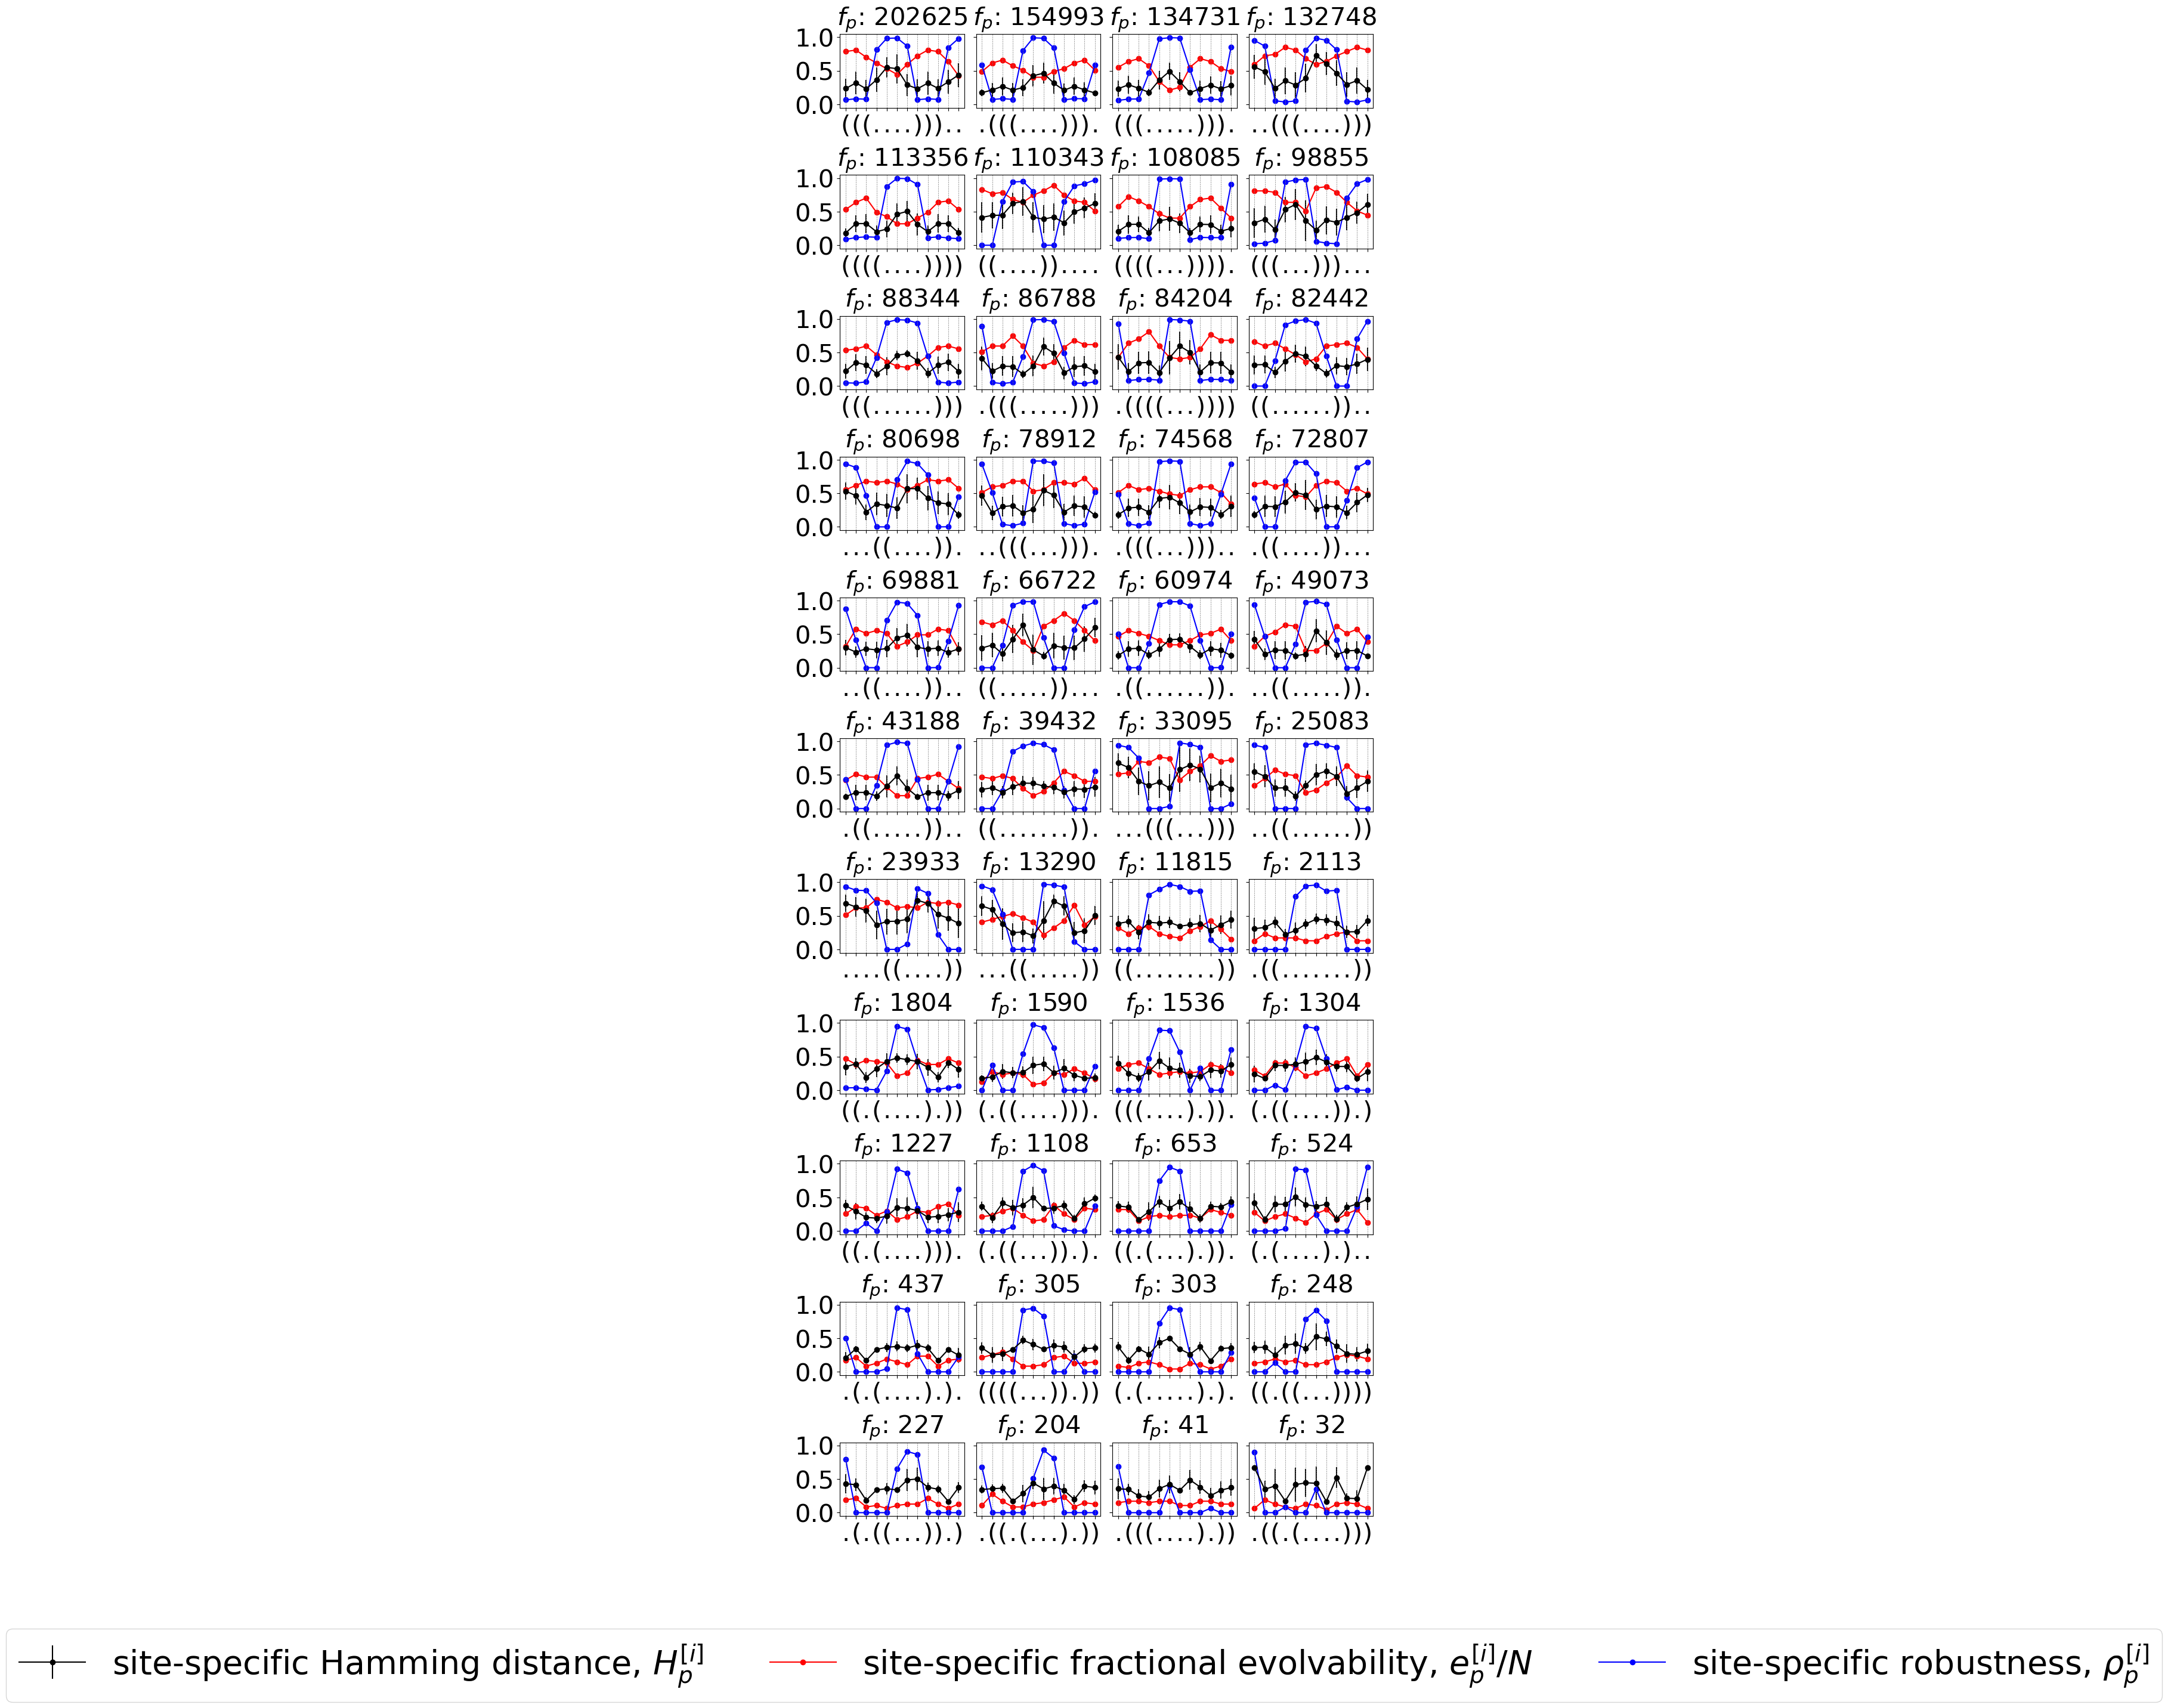

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict, Counter
import functools
import matplotlib.cm as cm
from main.functions.structurefunctions import mutationalneighbours_site

# Define the number of rows
num_rows = 11

# Calculate the number of columns needed
num_cols = 4

# Create a figure with the appropriate number of subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(num_cols * 2.5, num_rows * 2.5), sharey=True)

# Flatten the axs array for easy iteration
axs = axs.flatten()
sites_pos = np.arange(1, L + 1, 1)
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 10

# Collect handles and labels for the legend
handles, labels = [], []
listneutralsets = list(sort_neutralsets.keys())
largerobustsite = defaultdict(list)
for i, ax in enumerate(axs):
    
    if i < len(listneutralsets):
        key = listneutralsets[i + 1]

        # Fill the data dictionary with relative areas
       

        # Plot the line plot on top of the bar plot
        siteshamming = [0] * L
        siteshammingerr = [0] * L
        dataevolvability = [0] * L
        dataevolvweight = [0] * L
        datarobust = [0] * L

        for site, avgs in siteshammingmean[key].items():
            siteshamming[site] = avgs
            siteshammingerr[site] = siteshammingstd[key][site]
            dataevolvability[site] = sitesevolvability[key][site]  # Fractional evolvability
            datarobust[site] = sitesrobustness[key][site]
        sitesmaxlocal = []
        sites_local_max= find_local_maxima(datarobust)
        for seq in foldtoseq[key]:
                for site in sites_local_max:
                    if gpmap[seq] not in largerobustsite:
                        largerobustsite[gpmap[seq]] = set()
                    for mut in mutationalneighbours_site(seq, site):
                        if gpmap[seq] != gpmap[mut] and gpmap[mut] != '.' * 12:  # ignore robustness term
                            largerobustsite[gpmap[seq]].add(gpmap[mut])

        line1 = ax.errorbar(sites_pos, np.array(siteshamming), yerr=np.array(siteshammingerr), fmt = '-o', color='black', label=r'site-specific Hamming distance, $H_p^{[i]}$')
        line2, = ax.plot(sites_pos, np.array(dataevolvability), '-o', color='red', label=r'site-specific fractional evolvability, $e_p^{[i]}/N$')
        line3, = ax.plot(sites_pos, np.array(datarobust), '-o', color='blue', label=r'site-specific robustness, $\rho_p^{[i]}$')

        # Collect handles and labels from the plots
        if i == 0:
            handles.extend([line1, line2, line3])
            labels.extend([line1.get_label(), line2.get_label(), line3.get_label()])

        # Custom x-tick labels with larger or bold characters
        new_labels = []
        sumchar = 0
        labeldict = Counter(key)
        for char in key:
            if char == '.' and sumchar == labeldict['(']:
                new_labels.append('.')
            else:
                if char == '(':
                    sumchar += 1
                elif char == ')':
                    sumchar -= 1
                new_labels.append(char)
        ax.set_xticks(sites_pos)
        ax.set_xticklabels(new_labels, size=20)
        ax.set_title(f'$f_p$: {sort_neutralsets[key]}', fontsize=30)
        ax.set_yticks([1.0, 0.5, 0.0])
        ax.tick_params(axis='both', which='major', labelsize=30)  # Set tick label size
        for pos in sites_pos:
            ax.axvline(x=pos, color='gray', linestyle='--', linewidth=0.5)

# Add a legend for the entire figure at the bottom with two rows
fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.1), ncol=(len(listneutralsets) + 1) // 4, fontsize=40)

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig("sitequantities.png", bbox_inches='tight')
plt.show()

/tmp/ipykernel_1717124/625082619.py:183: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar


<Figure size 2000x300 with 0 Axes>

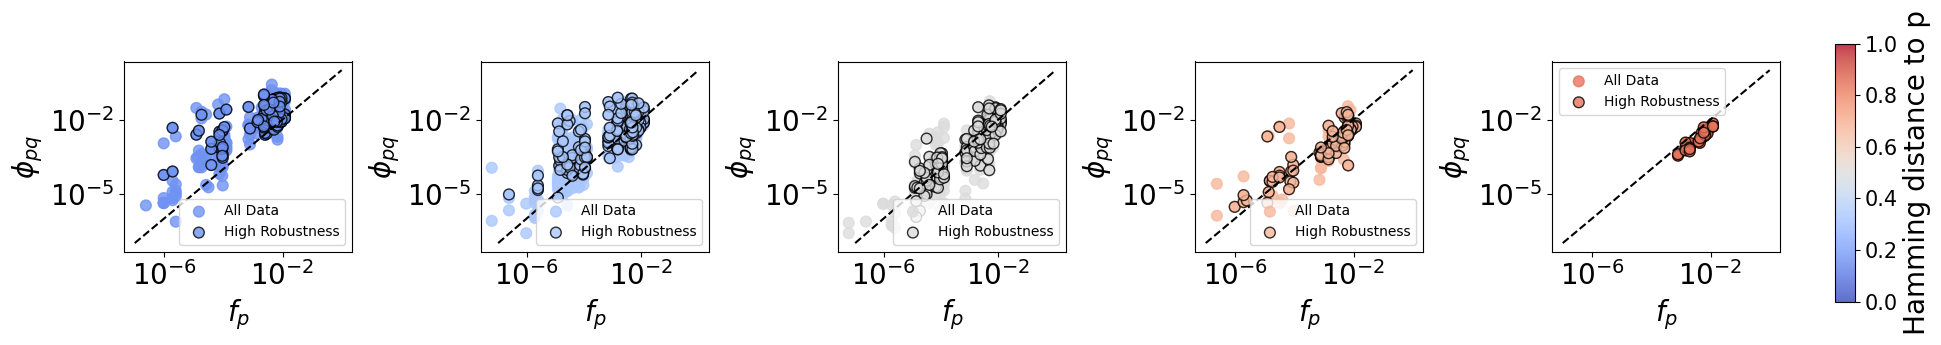

In [ ]:
#check that these are overrepresented 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 3))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:
            continue
        hamming_dist = hamming(key, q)
        listphipq.append(phi)
        listhamming.append(hamming_dist)
        listfreq.append(neutralsets[q+'\n'] / K**L)
       
        # Assign to appropriate range
        if hamming_dist < 4/12:
            idx = 0
        elif hamming_dist < 6/12:
            idx = 1
        elif hamming_dist < 8/12:
            idx = 2
        elif hamming_dist < 10/12:
            idx = 3
        else:
            idx = 4

        listphipq_ranges[idx].append(phi)
        listhamming_ranges[idx].append(hamming_dist)
        listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)
        if q in list(largerobustsite[key]):
            listphipq_ranges_highrobust[idx].append(phi)
            listhamming_ranges_highrobust[idx].append(hamming_dist)
            listfreq_ranges_highrobust[idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
#check that these are overrepresented 
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

fig = plt.figure(figsize=(20, 3))
gs = GridSpec(1, 5, figure=fig)

plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 15
cmap = plt.get_cmap('coolwarm')
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)

listphipq = []
listhamming = []
listfreq = []

# Lists for different Hamming distance ranges
listphipq_ranges = [[] for _ in range(5)]
listhamming_ranges = [[] for _ in range(5)]
listfreq_ranges = [[] for _ in range(5)]
listphipq_ranges_highrobust = [[] for _ in range(5)]
listhamming_ranges_highrobust = [[] for _ in range(5)]
listfreq_ranges_highrobust = [[] for _ in range(5)]
# Process data and aggregate for the scatter plot
for i, key in enumerate(sort_neutralsets.keys()):
    if i == 0:
        continue

    qitems = phipq[key]
    
    for q, phi in qitems.items():
        if q == '.'*L or q == key:
            continue
        hamming_dist = hamming(key, q)
        listphipq.append(phi)
        listhamming.append(hamming_dist)
        listfreq.append(neutralsets[q+'\n'] / K**L)
       
        # Assign to appropriate range
        if hamming_dist < 4/12:
            idx = 0
        elif hamming_dist < 6/12:
            idx = 1
        elif hamming_dist < 8/12:
            idx = 2
        elif hamming_dist < 10/12:
            idx = 3
        else:
            idx = 4

        listphipq_ranges[idx].append(phi)
        listhamming_ranges[idx].append(hamming_dist)
        listfreq_ranges[idx].append(neutralsets[q+'\n'] / K**L)
        if q in list(largerobustsite[key]):
            listphipq_ranges_highrobust[idx].append(phi)
            listhamming_ranges_highrobust[idx].append(hamming_dist)
            listfreq_ranges_highrobust[idx].append(neutralsets[q+'\n'] / K**L)

# Create subplots
axes = []
for j in range(5):
    ax = fig.add_subplot(gs[0, j])
    scatter = ax.scatter(listfreq_ranges[j], listphipq_ranges[j], s=60, c=listhamming_ranges[j], cmap=cmap, norm=norm, alpha=0.8, label='All Data')
    scatter_highrobust = ax.scatter(listfreq_ranges_highrobust[j], listphipq_ranges_highrobust[j], s=60, c=listhamming_ranges_highrobust[j], cmap=cmap, norm=norm, alpha=0.8, edgecolor='black', label='High Robustness')
    ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
    ax.set_xscale("log")
    ax.set_yscale('log')
    ax.set_xticks([1e-6, 1e-2])
    ax.set_xlabel(r'$f_p$', fontsize=20)
    ax.set_ylabel(r'$\phi_{pq}$', fontsize=20)
    ax.tick_params(axis='both', which='major', labelsize=20)
    axes.append(ax)

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_axes([0.92, 0.15, 0.01, 0.86])  # [left, bottom, width, height]
cbar = fig.colorbar(scatter, cax=cbar_ax)
cbar.set_label('Hamming distance to p', fontsize=20)
cbar.ax.tick_params(labelsize=15)

# Add legend
for ax in axes:
    ax.legend()

plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to make space for colorbar
plt.savefig("phipq_combined.png", bbox_inches='tight')
plt.show()

## correlations


((.(...).)).
(.(....).)..
.(.(....).).
((((...)).))
(.(.....).).
((.((...))))
.(.((...)).)
.((.(...).))
.(((....).))
.((.(....)))
(((....)).).
..(.(....).)
(..(....)..)


/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:520: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/core/_methods.py:121: RuntimeWarning: invalid value encountered in divide
  ret = um.true_divide(
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/pg520/.conda/envs/biopython/lib/python3.9/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value e

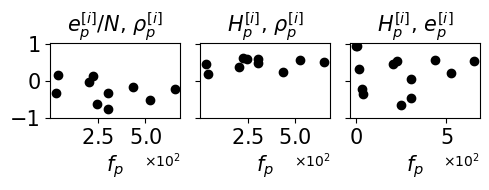

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter, defaultdict, OrderedDict
import functools
from matplotlib.ticker import ScalarFormatter

# Initialize variables
freq = []
corr_er_uc = []
corr_er_c = []
corr_er_in = []
corr_er = []
corr_hr_uc = []
corr_hr_c = []
corr_hr_in = []
corr_hr = []
corr_he_uc = []
corr_he_c = []
corr_he_in = []
corr_he = []
dataevolvabilitytott = []
datarobustnesstott = []
siteshamming = []
sitesminev = defaultdict(int)
datarobustpheno = defaultdict(float)


listneutralsets = list(sort_neutralsets.keys())
param= 2 #print range of neutral space size
params = {
    5: listneutralsets[1:8],
    4: listneutralsets[8:(8+20)],
    3: listneutralsets[(8+20):(8+20+7)],
    2: listneutralsets[(8+20+7):]
}
listneutralsets = params[param]
for key in listneutralsets:
    print(key)
    sitesum = 0
    dataevolvability_uc = []
    datarobustness_uc = []
    siteshamming_uc = []
    dataevolvability_c = []
    datarobustness_c = []
    siteshamming_c = []
    dataevolvability_in = []
    datarobustness_in = []
    siteshamming_in = []
    dataevolvability = []
    datarobustness = []
    siteshamming = []
    datarobustnesstot = []
    for site in range(12):
            dictsymbols = Counter(key)  # Count the number of symbols at each site
            #if sitesum >= dictsymbols['(']:
            #    siteshamming_in.append(avgs / edgeD_nodel[key][site])
            #    dataevolvability_in.append(phenos_site_evol[key][site] / (len(sort_neutralsets) - 1))  # Fractional evolvability
            #    datarobustness_in.append(phenos_site_robust[key][site] / edge_site_robust[key])  # Fractional robustness
            # if key[site] == '.':
            #     siteshamming_uc.append(siteshammingmean[key][site])
            #     dataevolvability_uc.append(sitesevolvability[key][site])  # Fractional evolvability
            #     datarobustness_uc.append(sitesrobustness[key][site])
            #     sitesum += 0
            # elif key[site] == '(':
            #     siteshamming_c.append(siteshammingmean[key][site])
            #     dataevolvability_c.append(sitesevolvability[key][site])
            #     datarobustness_c.append(sitesrobustness[key][site])
            #     sitesum += 1
            # elif key[site] == ')':
            #     siteshamming_c.append(siteshammingmean[key][site])
            #     dataevolvability_c.append(sitesevolvability[key][site])
            #     datarobustness_c.append(sitesrobustness[key][site])
            #     sitesum -= 1
        
            siteshamming.append(siteshammingmean[key][site])
            dataevolvability.append(sitesevolvability[key][site])  # Fractional evolvability
            datarobustness.append(sitesrobustness[key][site])  # Fractional robustness
    
    corr_er_uc.append(np.corrcoef(datarobustness_uc, dataevolvability_uc)[0, 1])
    corr_er_c.append(np.corrcoef(datarobustness_c, dataevolvability_c)[0, 1])
    corr_er_in.append(np.corrcoef(datarobustness_in, dataevolvability_in)[0, 1])
    corr_er.append(np.corrcoef(datarobustness, dataevolvability)[0, 1])
    corr_hr_uc.append(np.corrcoef(siteshamming_uc, datarobustness_uc)[0, 1])
    corr_hr_c.append(np.corrcoef(siteshamming_c, datarobustness_c)[0, 1])
    corr_hr_in.append(np.corrcoef(siteshamming_in, datarobustness_in)[0, 1])
    corr_hr.append(np.corrcoef(siteshamming, datarobustness)[0, 1])
    corr_he_uc.append(np.corrcoef(siteshamming_uc, dataevolvability_uc)[0, 1])
    corr_he_c.append(np.corrcoef(siteshamming_c, dataevolvability_c)[0, 1])
    corr_he_in.append(np.corrcoef(siteshamming_in, dataevolvability_in)[0, 1])
    corr_he.append(np.corrcoef(siteshamming, dataevolvability)[0, 1])
    freq.append(sort_neutralsets[key])

#phenotype evolvability and robustness
#dataevolvabilitytott = []
#datarobustnesstott = []
#for pheno in evolvtot.keys():
#    dataevolvabilitytott.append(evolvtot[pheno])
#    datarobustnesstott.append(datarobustpheno[pheno])

# Create subplots
fig, axs = plt.subplots(1, 3, figsize=(5, 2), sharey=True)

# Collect handles and labels for the legend
handles, labels = [], []

# Plot the first subplot
#scatter1 = axs[0].scatter(freq, corr_er_uc, color='black', label=r'unconstrained')
#scatter2 = axs[0].scatter(freq, corr_er_c, color='blue', label=r'constrained')
#scatter3 = axs[0].scatter(freq, corr_er_in, color='green', label=r'(x) unconstrained only')
scatter4 = axs[0].scatter(freq, corr_er, color='black', label=r'all sites')
#axs[0].set_xscale('log')
axs[0].set_xlabel('$f_p$', fontsize=15)
#axs[0].set_ylabel(r'Pearson $r$', fontsize=15)
axs[0].set_title(r'$e_p^{[i]}/N$, $\rho_p^{[i]}$', fontsize=15)
axs[0].tick_params(axis='both', which='major', labelsize=15)

# Plot the second subplot
#axs[1].scatter(freq, corr_hr_uc, color='black', label=r'hr_uc')
#axs[1].scatter(freq, corr_hr_c, color='blue', label=r'hr_c')
#axs[1].scatter(freq, corr_hr_in, color='green', label=r'hr_in')
axs[1].scatter(freq, corr_hr, color='black', label=r'hr')
#axs[1].set_xscale('log')
#axs[1].set_ylabel(r'Pearson $r$', fontsize=15)
axs[1].set_xlabel('$f_p$', fontsize=15)
axs[1].set_title(r'$H_p^{[i]}$, $\rho_p^{[i]}$', fontsize=15)
axs[1].tick_params(axis='both', which='major', labelsize=15)

# Plot the third subplot
#axs[2].scatter(freq, corr_he_uc, color='black', label=r'he_uc', marker='o')
#axs[2].scatter(freq, corr_he_c, color='blue', label=r'he_c')
#axs[2].scatter(freq, corr_he_in, color='green', label=r'he_in', marker='o')
axs[2].scatter(freq, corr_he, color='black', label=r'he')
#axs[2].set_xscale('log')
axs[2].set_xlabel('$f_p$', fontsize=15)
axs[2].set_title(r'$H_p^{[i]}$, $e_p^{[i]}$', fontsize=15)
axs[2].tick_params(axis='both', which='major', labelsize=15)

# Collect handles and labels from the plots
#handles.extend([scatter1, scatter2, scatter3, scatter4])
#handles.extend([scatter1, scatter2, scatter4])
#handles.extend([scatter1, scatter2])
#labels.extend([scatter1.get_label(), scatter2.get_label(), scatter3.get_label(), scatter4.get_label()])
#labels.extend([scatter1.get_label(), scatter2.get_label()])

# Format x-ticks in scientific notation
for ax in axs:
    ax.xaxis.set_major_formatter(ScalarFormatter(useMathText=True))
    ax.xaxis.get_major_formatter().set_powerlimits((0, 0))
    ax.set_yticks([1.0, 0.0, -1.0])

# Add a legend for the entire figure at the bottom with two rows
#fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.4), ncol=1, fontsize=15)

# Show the plot
plt.tight_layout()
plt.savefig("correlationstot"+str(param)+".png", bbox_inches='tight')
plt.show()

# Prediction of largest jump?


In [7]:
from collections import Counter
from collections import defaultdict
import functools
phenosminev = defaultdict(functools.partial(defaultdict, list))
for pheno, phenos in phenos_site_nodel.items():
    for site, site_phenos in phenos.items():
        if site == sitesminev[pheno]:
            phenosminev[pheno][site] = list(dict(Counter(site_phenos)).keys())

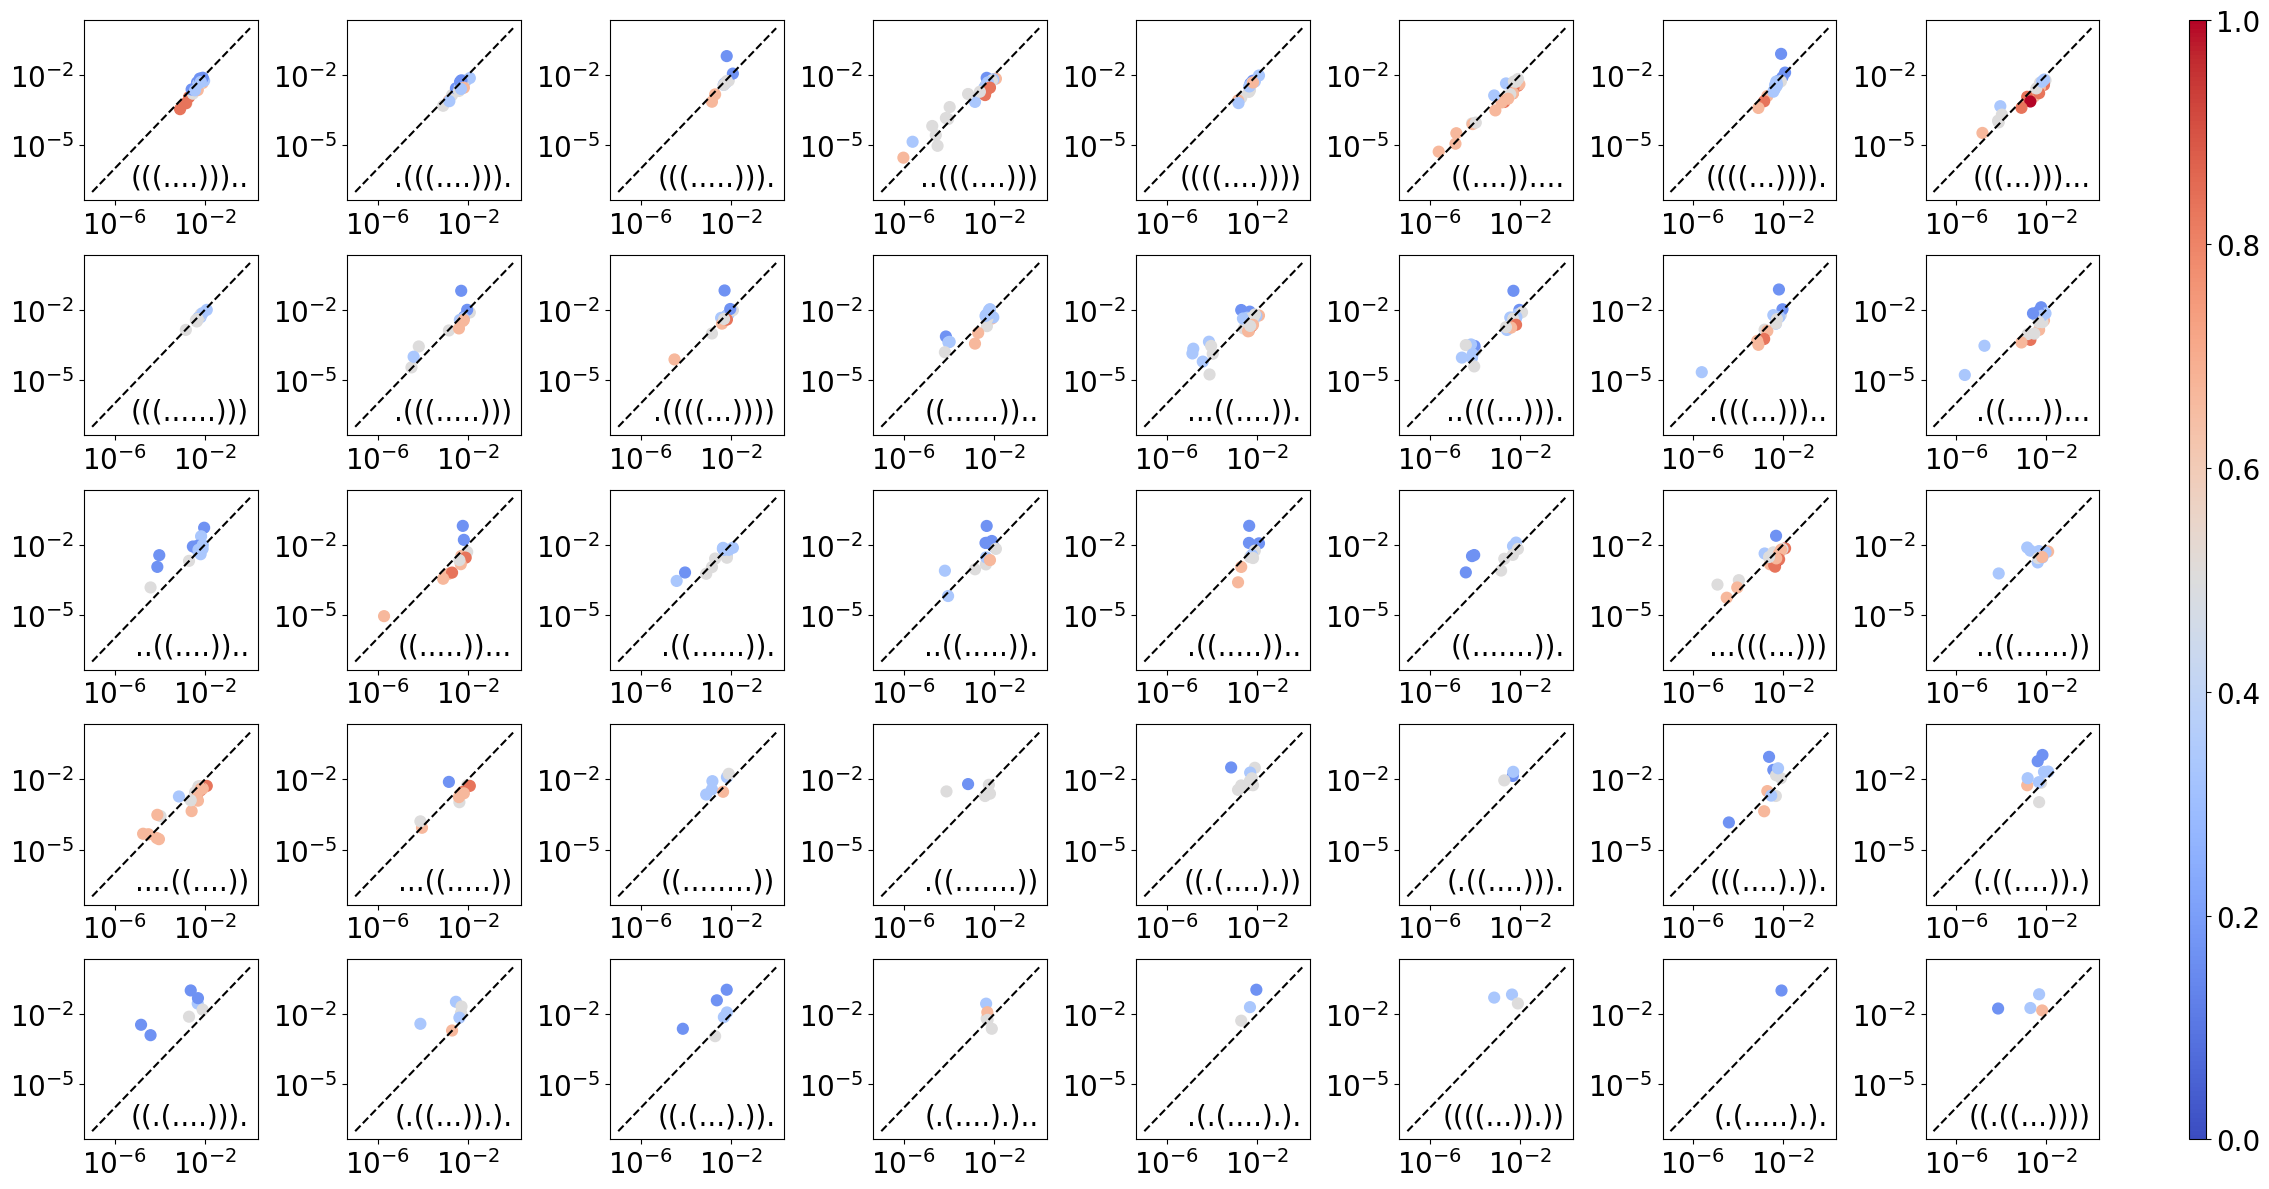

In [14]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import sys
from matplotlib.gridspec import GridSpec
sys.path.append('/home/pg520/phenodistance')
from main.functions.structurefunctions import hamming

class MidpointNormalize(mcolors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=0.5, clip=False):
        self.midpoint = midpoint
        super().__init__(vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # Normalize the values
        result, is_scalar = self.process_value(value)
        vmin, vmax, midpoint = self.vmin, self.vmax, self.midpoint

        # Shift the values to the range [0, 1]
        result = np.ma.masked_array((result - vmin) / (vmax - vmin))
        result = np.ma.masked_array(np.interp(result, [0, midpoint, 1], [0, 0.5, 1]))

        if is_scalar:
            result = result[0]
        return result

# Create a grid layout with space for the colorbar
fig = plt.figure(figsize=(24, 12))
gs = GridSpec(5, 9, figure=fig, width_ratios=[1, 1, 1, 1, 1, 1, 1, 1, 0.1])

plt.rcParams['axes.labelsize'] = 5
plt.rcParams['axes.titlesize'] = 5
cmap = plt.get_cmap('coolwarm')  # Get the colormap
norm = MidpointNormalize(vmin=0, vmax=1, midpoint=0.5)  # Use custom normalization

axs = [fig.add_subplot(gs[i, j]) for i in range(5) for j in range(8)]

for i, ax in enumerate(axs):
    if i < len(phipq):
        key = list(sort_neutralsets.keys())[i+1]
        qitems = phipq[key]
        listphipq = []
        listhamming = []
        listfreq = []
        
        for q, phi in qitems.items():
            if q in phenosminev[key][sitesminev[key]]:  # Skip the neutral set and the del sequence
                listphipq.append(phi)
                listhamming.append(hamming(key, q))
                listfreq.append(neutralsets[q+'\n'] / K**L)
        
        scatter = ax.scatter(listfreq, listphipq, s=60, c=listhamming, cmap=cmap, norm=norm, alpha=1)  # Use the colormap to determine the color

        ax.plot([1e-7, 1], [1e-7, 1], color='black', linestyle='--')
        ax.set_xscale("log")
        ax.set_yscale('log')
        ax.set_xticks([1e-6, 1e-2])
        ax.text(0.95, 0.05, key, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes, fontsize=20)
        ax.tick_params(axis='both', which='major', labelsize=20)  # Set tick label size

# Add a colorbar for the entire figure on the side
cbar_ax = fig.add_subplot(gs[:, -1])  # Create an axis for the colorbar
cbar = fig.colorbar(scatter, cax=cbar_ax, orientation='vertical')
cbar.set_label('')
cbar.ax.tick_params(labelsize=20)

plt.tight_layout(rect=[0, 0, 0.95, 1])  # Adjust layout to make space for the colorbar
plt.savefig("phipq.png", bbox_inches='tight')
plt.show()